In [1]:
from core.utils_data import getCleanGBMLGG
from core.utils_analysis import *
import pandas as pd
import numpy as np
from tqdm import tqdm

pathgraphomic_fusion
./data/TCGA_GBMLGG/splits/gbmlgg15cv_all_st_patches_512_1_0_1_rnaseq.pkl
pathgraphomic_fusion
./data/TCGA_GBMLGG/splits/gbmlgg15cv_all_st_patches_512_1_0_1_rnaseq.pkl


# Glioma Grade Classification

In [2]:
models = ['omic', 'omicomic_fusion', 
          'graph', 'graphgraph_fusion', 
          'path', 'pathpath_fusion', 
          'pathomic_fusion', 'graphomic_fusion', 'pathgraphomic_fusion']
model_names = ['Genomic SNN', 'Genomic (SNN + SNN)',
               'Histology GCN', 'Histology (GCN + GCN)',
               'Histology CNN', 'Histology (CNN + CNN)',
               'Pathomic F. (CNN+SNN)', 'Pathomic F. (GCN+SNN)', 'Pathomic F. (CNN+GCN+SNN)']

In [3]:
cv_grad_split = pd.DataFrame(np.array([calcGradMetrics(*getPredAggGrad_GBMLGG(model=model, agg_type='max'))
                             for model in tqdm(models)])) 
cv_grad_split.index = models
cv_grad_split.columns = ['Split %s' % str(k) for k in range(1,16)]
cv_grad_split

100%|██████████| 9/9 [00:07<00:00,  1.16it/s]


Split 1   Split 2   Split 3   Split 4   Split 5  \
omic                  0.870921  0.818985  0.848255  0.859820  0.867791   
omicomic_fusion       0.868217  0.823306  0.845186  0.856061  0.868477   
graph                 0.856920  0.851084  0.855354  0.863435  0.877695   
graphgraph_fusion     0.843910  0.858464  0.837033  0.883551  0.887627   
path                  0.899075  0.893937  0.875535  0.904758  0.900604   
pathpath_fusion       0.892855  0.895665  0.884277  0.914601  0.912209   
pathomic_fusion       0.914488  0.888230  0.914006  0.934573  0.925267   
graphomic_fusion      0.907623  0.877668  0.907418  0.935463  0.930535   
pathgraphomic_fusion  0.900036  0.889877  0.902985  0.940025  0.941344   

                       Split 6   Split 7   Split 8   Split 9  Split 10  \
omic                  0.852812  0.856891  0.835926  0.830391  0.814153   
omicomic_fusion       0.854568  0.861757  0.836646  0.829319  0.816815   
graph                 0.821427  0.838026  0.773243  0.856705  0.887346   
graphgraph_fusion     0.812675  0.836680  0.828920  0.858125  0.866560   
path                  0.872949  0.885643  0.868760  0.878536  0.874102   
pathpath_fusion       0.872016  0.896434  0.864258  0.887447  0.877079   
pathomic_fusion       0.892977  0.902671  0.870731  0.908902  0.884732   
graphomic_fusion      0.875665  0.890482  0.863978  0.898780  0.907124   
pathgraphomic_fusion  0.897599  0.908196  0.881400  0.918690  0.912226   

                      Split 11  Split 12  Split 13  Split 14  Split 15  
omic                  0.855710  0.861678  0.871914  0.838929  0.899139  
omicomic_fusion       0.861657  0.861337  0.871756  0.839029  0.899139  
graph                 0.840769  0.840939  0.852797  0.841397  0.848633  
graphgraph_fusion     0.836953  0.841776  0.866560  0.834539  0.854034  
path                  0.870858  0.875535  0.889676  0.857653  0.886765  
pathpath_fusion       0.888491  0.883130  0.881078  0.875201  0.887024  
pathomic_fusion       0.914630  0.909821  0.898195  0.899851  0.915405  
graphomic_fusion      0.919689  0.905915  0.893141  0.895776  0.918091  
pathgraphomic_fusion  0.919364  0.887981  0.904022  0.904126  0.923492

In [4]:
cv_grad = pd.DataFrame(np.array([calcAggGradMetrics(*getPredAggGrad_GBMLGG(model=model, agg_type='max'))
                       for model in tqdm(models)]))
cv_grad.index = models
cv_grad.columns = ['AUC', 'AP', 'F1', 'F1 Grade IV']
cv_grad

100%|██████████| 9/9 [00:08<00:00,  1.11it/s]


AUC              AP              F1  \
omic                  0.8522 ± 0.012  0.7287 ± 0.018  0.6503 ± 0.016   
omicomic_fusion       0.8529 ± 0.012  0.7295 ± 0.019  0.6503 ± 0.018   
graph                 0.8471 ± 0.014  0.7627 ± 0.017  0.6493 ± 0.024   
graphgraph_fusion     0.8498 ± 0.011  0.7649 ± 0.016  0.6492 ± 0.015   
path                  0.8823 ± 0.007  0.7791 ± 0.020  0.7152 ± 0.022   
pathpath_fusion       0.8875 ± 0.008  0.8083 ± 0.014  0.7176 ± 0.017   
pathomic_fusion       0.9050 ± 0.009  0.8338 ± 0.016  0.7330 ± 0.019   
graphomic_fusion      0.9018 ± 0.011  0.8243 ± 0.018  0.7318 ± 0.020   
pathgraphomic_fusion  0.9088 ± 0.010  0.8360 ± 0.018  0.7459 ± 0.021   

                         F1 Grade IV  
omic                  0.8541 ± 0.018  
omicomic_fusion       0.8552 ± 0.017  
graph                 0.8148 ± 0.027  
graphgraph_fusion     0.8155 ± 0.019  
path                  0.8799 ± 0.017  
pathpath_fusion       0.8734 ± 0.014  
pathomic_fusion       0.9141 ± 0.013  
graphomic_fusion      0.9127 ± 0.017  
pathgraphomic_fusion  0.9235 ± 0.013

Class: 0
	path - AUC: 0.859 ± 0.020
	omic - AUC: 0.841 ± 0.027
	pathgraphomic_fusion - AUC: 0.877 ± 0.030
Class: 1
	path - AUC: 0.785 ± 0.032
	omic - AUC: 0.677 ± 0.045
	pathgraphomic_fusion - AUC: 0.814 ± 0.032
Class: 2
	path - AUC: 0.948 ± 0.020
	omic - AUC: 0.921 ± 0.022
	pathgraphomic_fusion - AUC: 0.976 ± 0.016
Class: micro
	path - AUC: 0.882 ± 0.013
	omic - AUC: 0.852 ± 0.021
	pathgraphomic_fusion - AUC: 0.909 ± 0.017


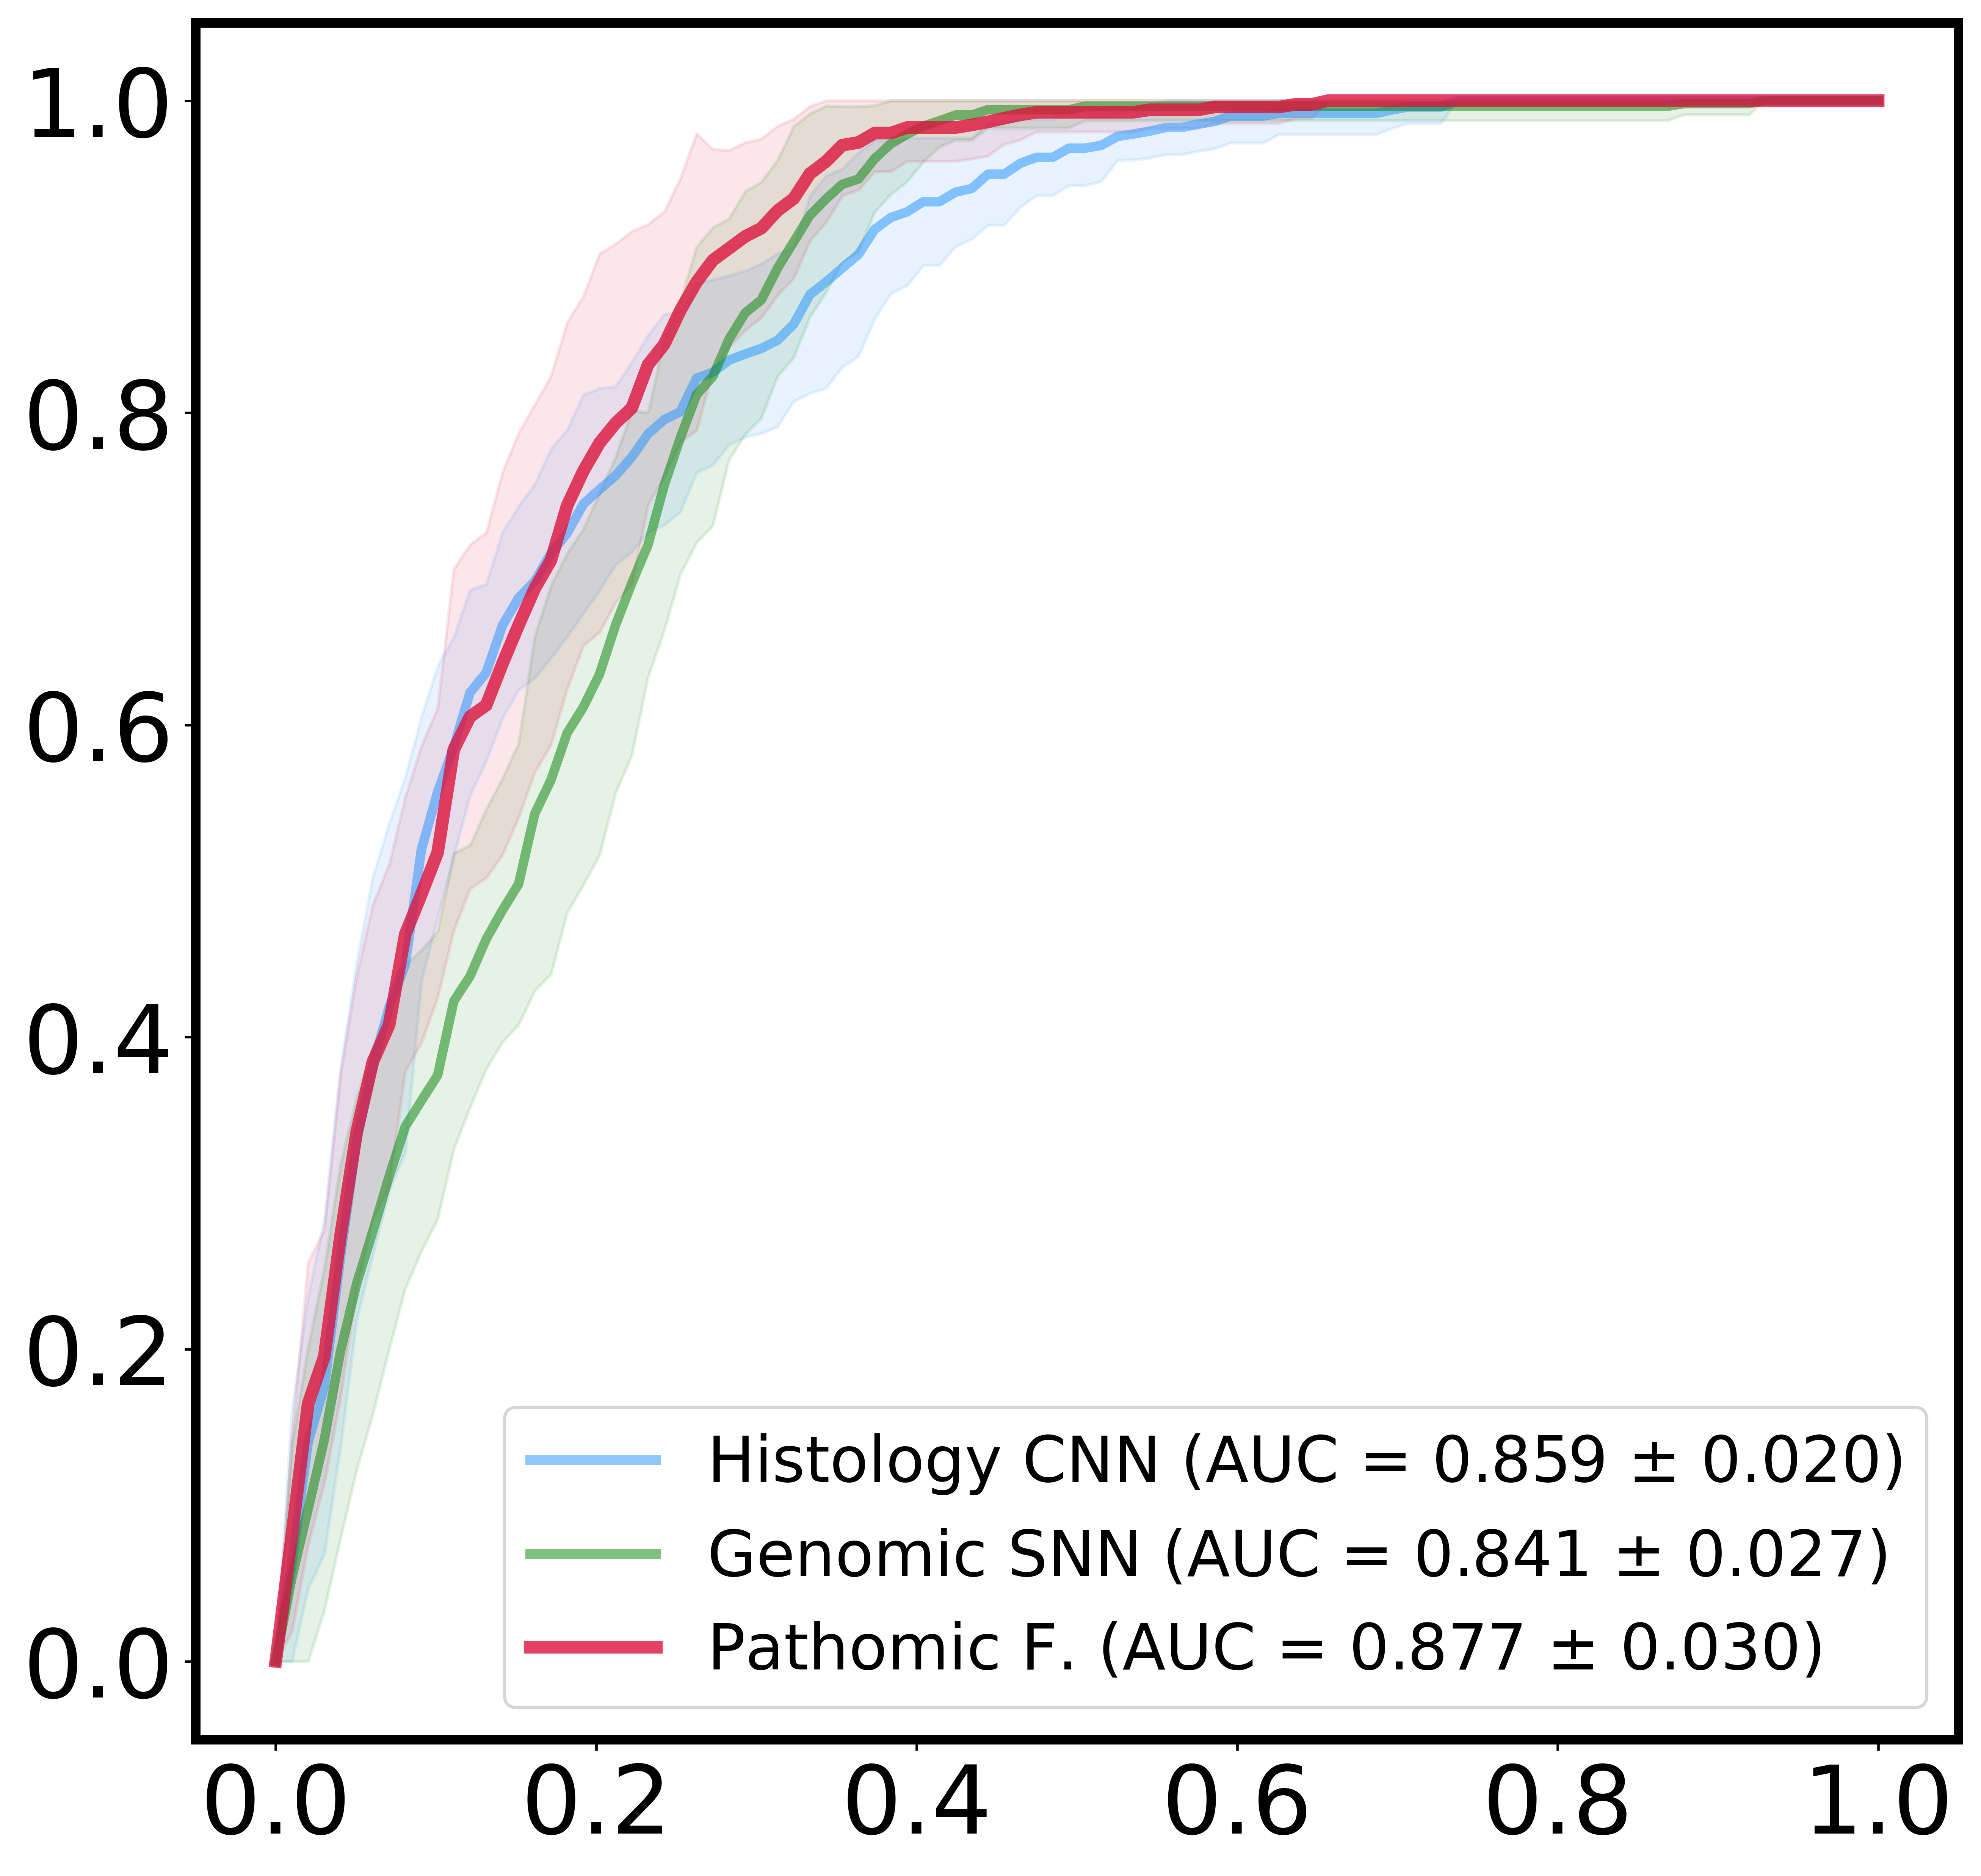

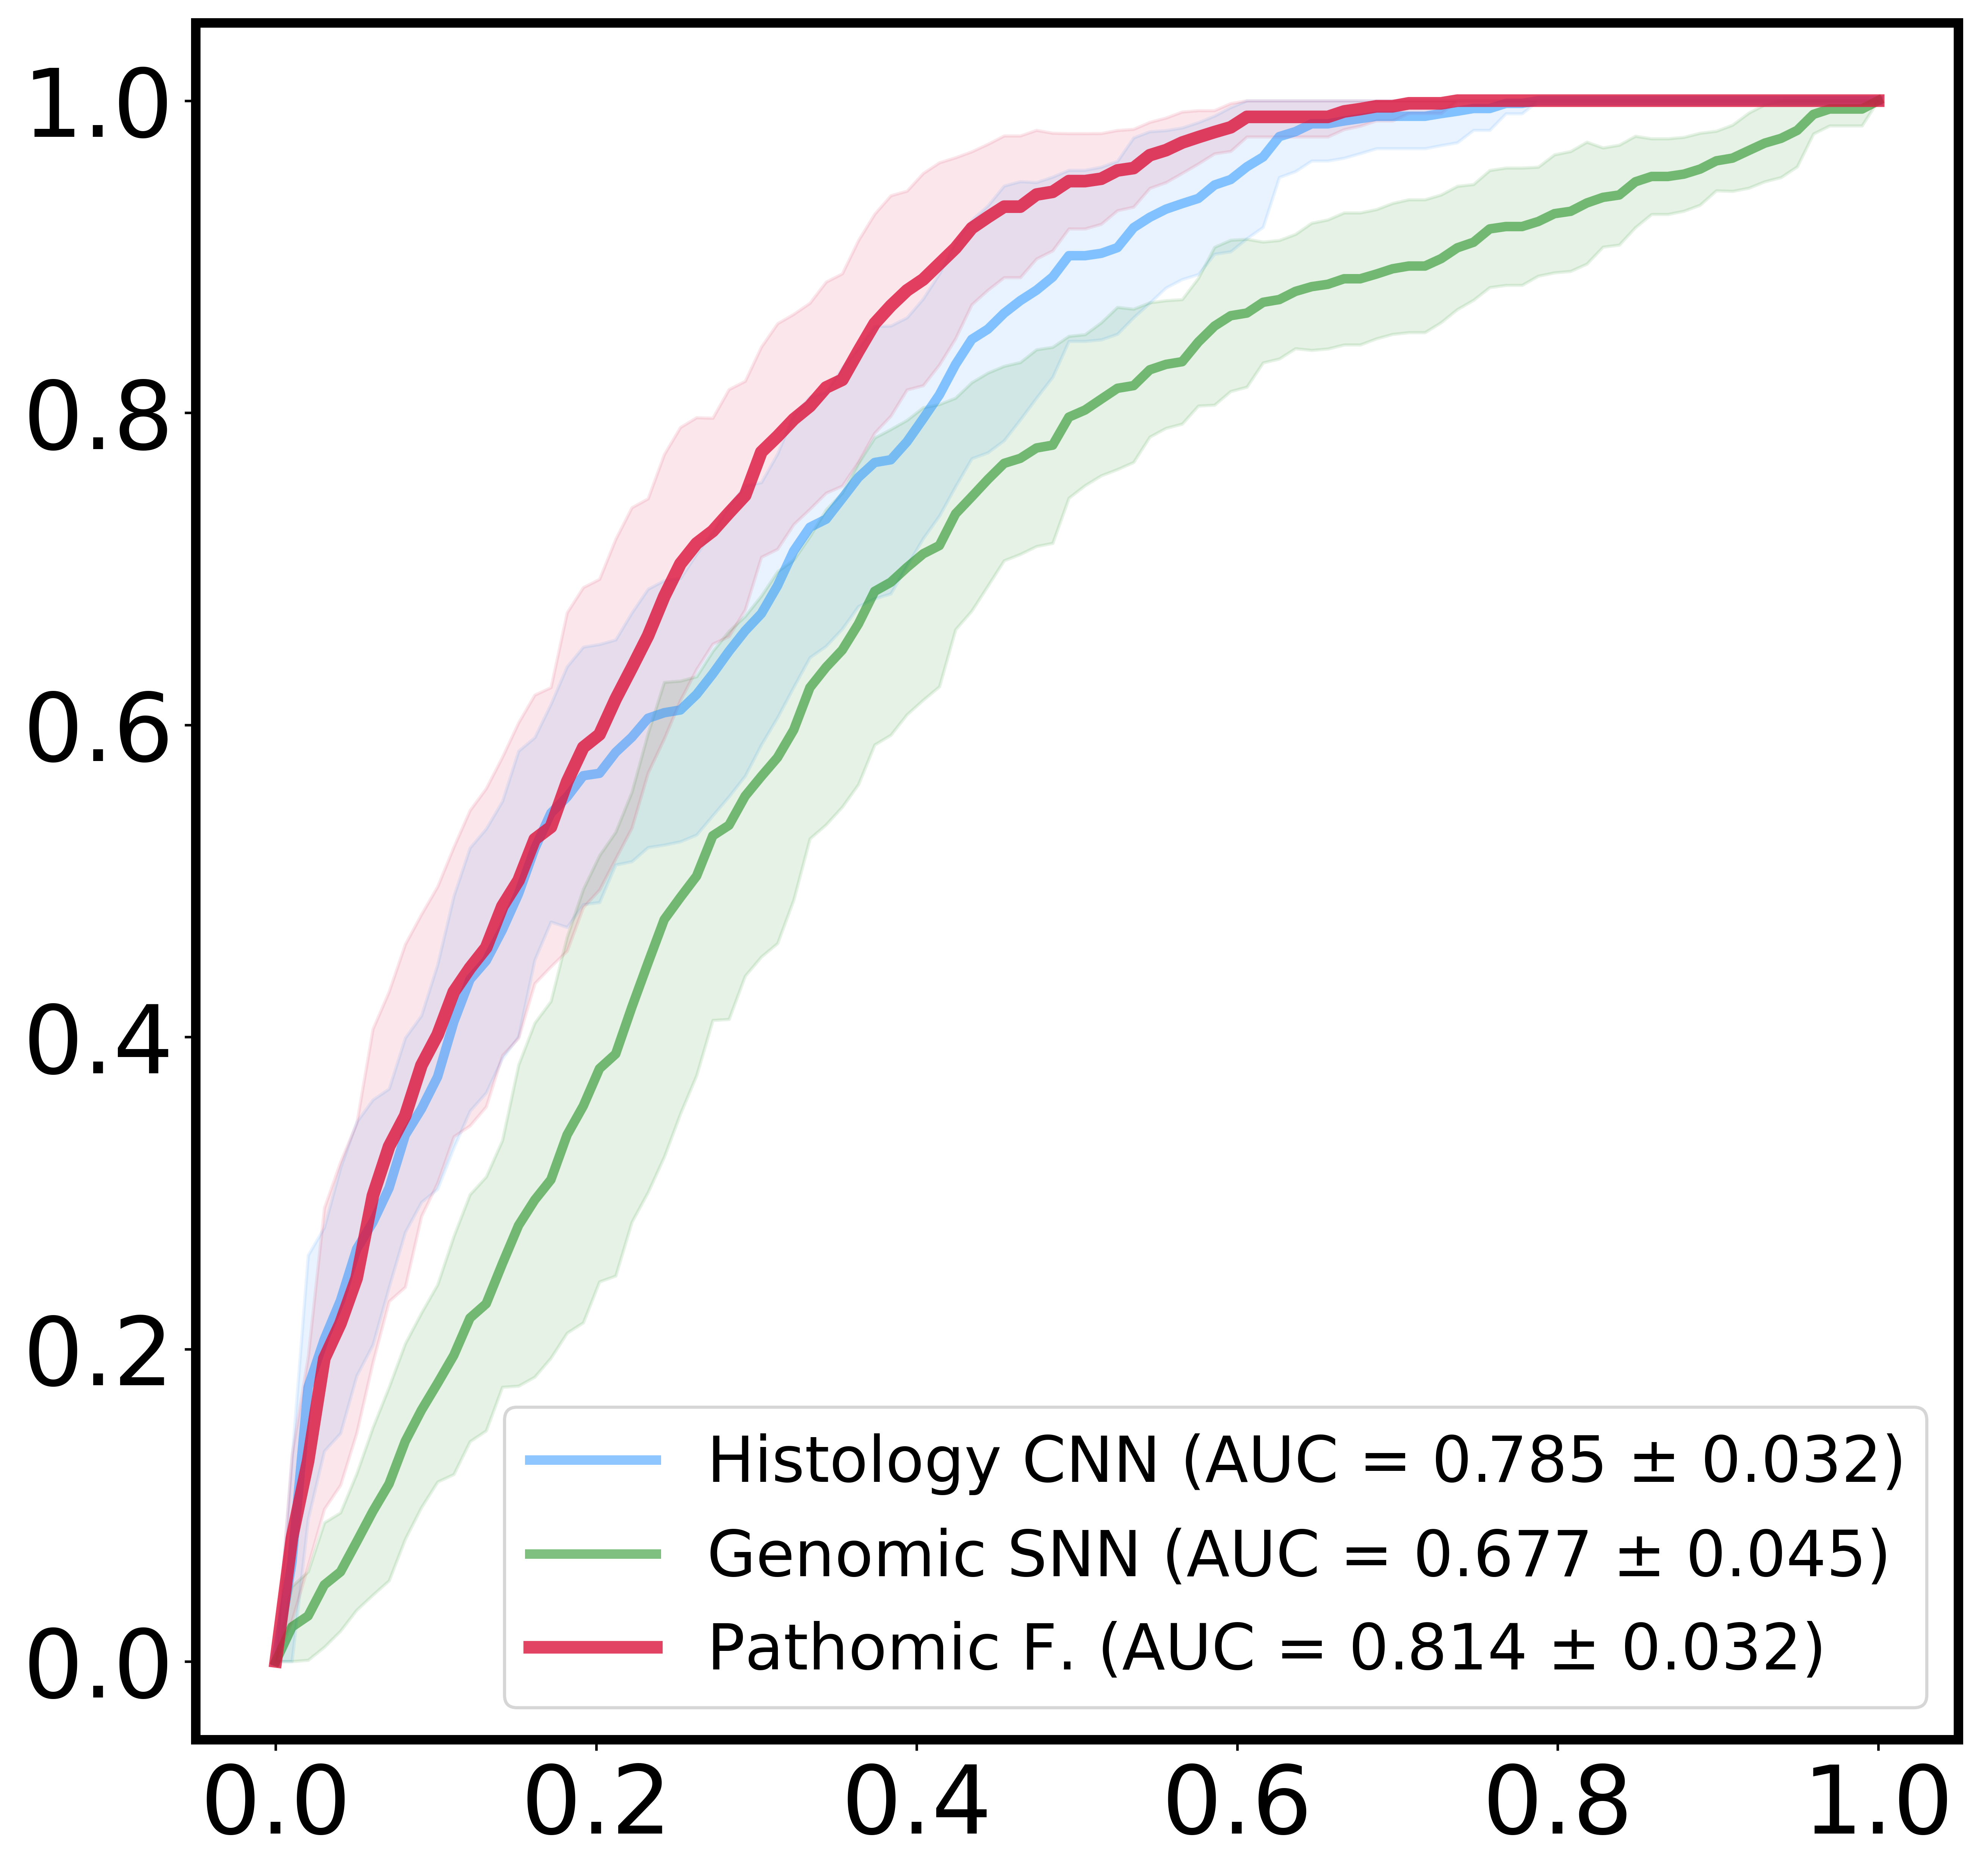

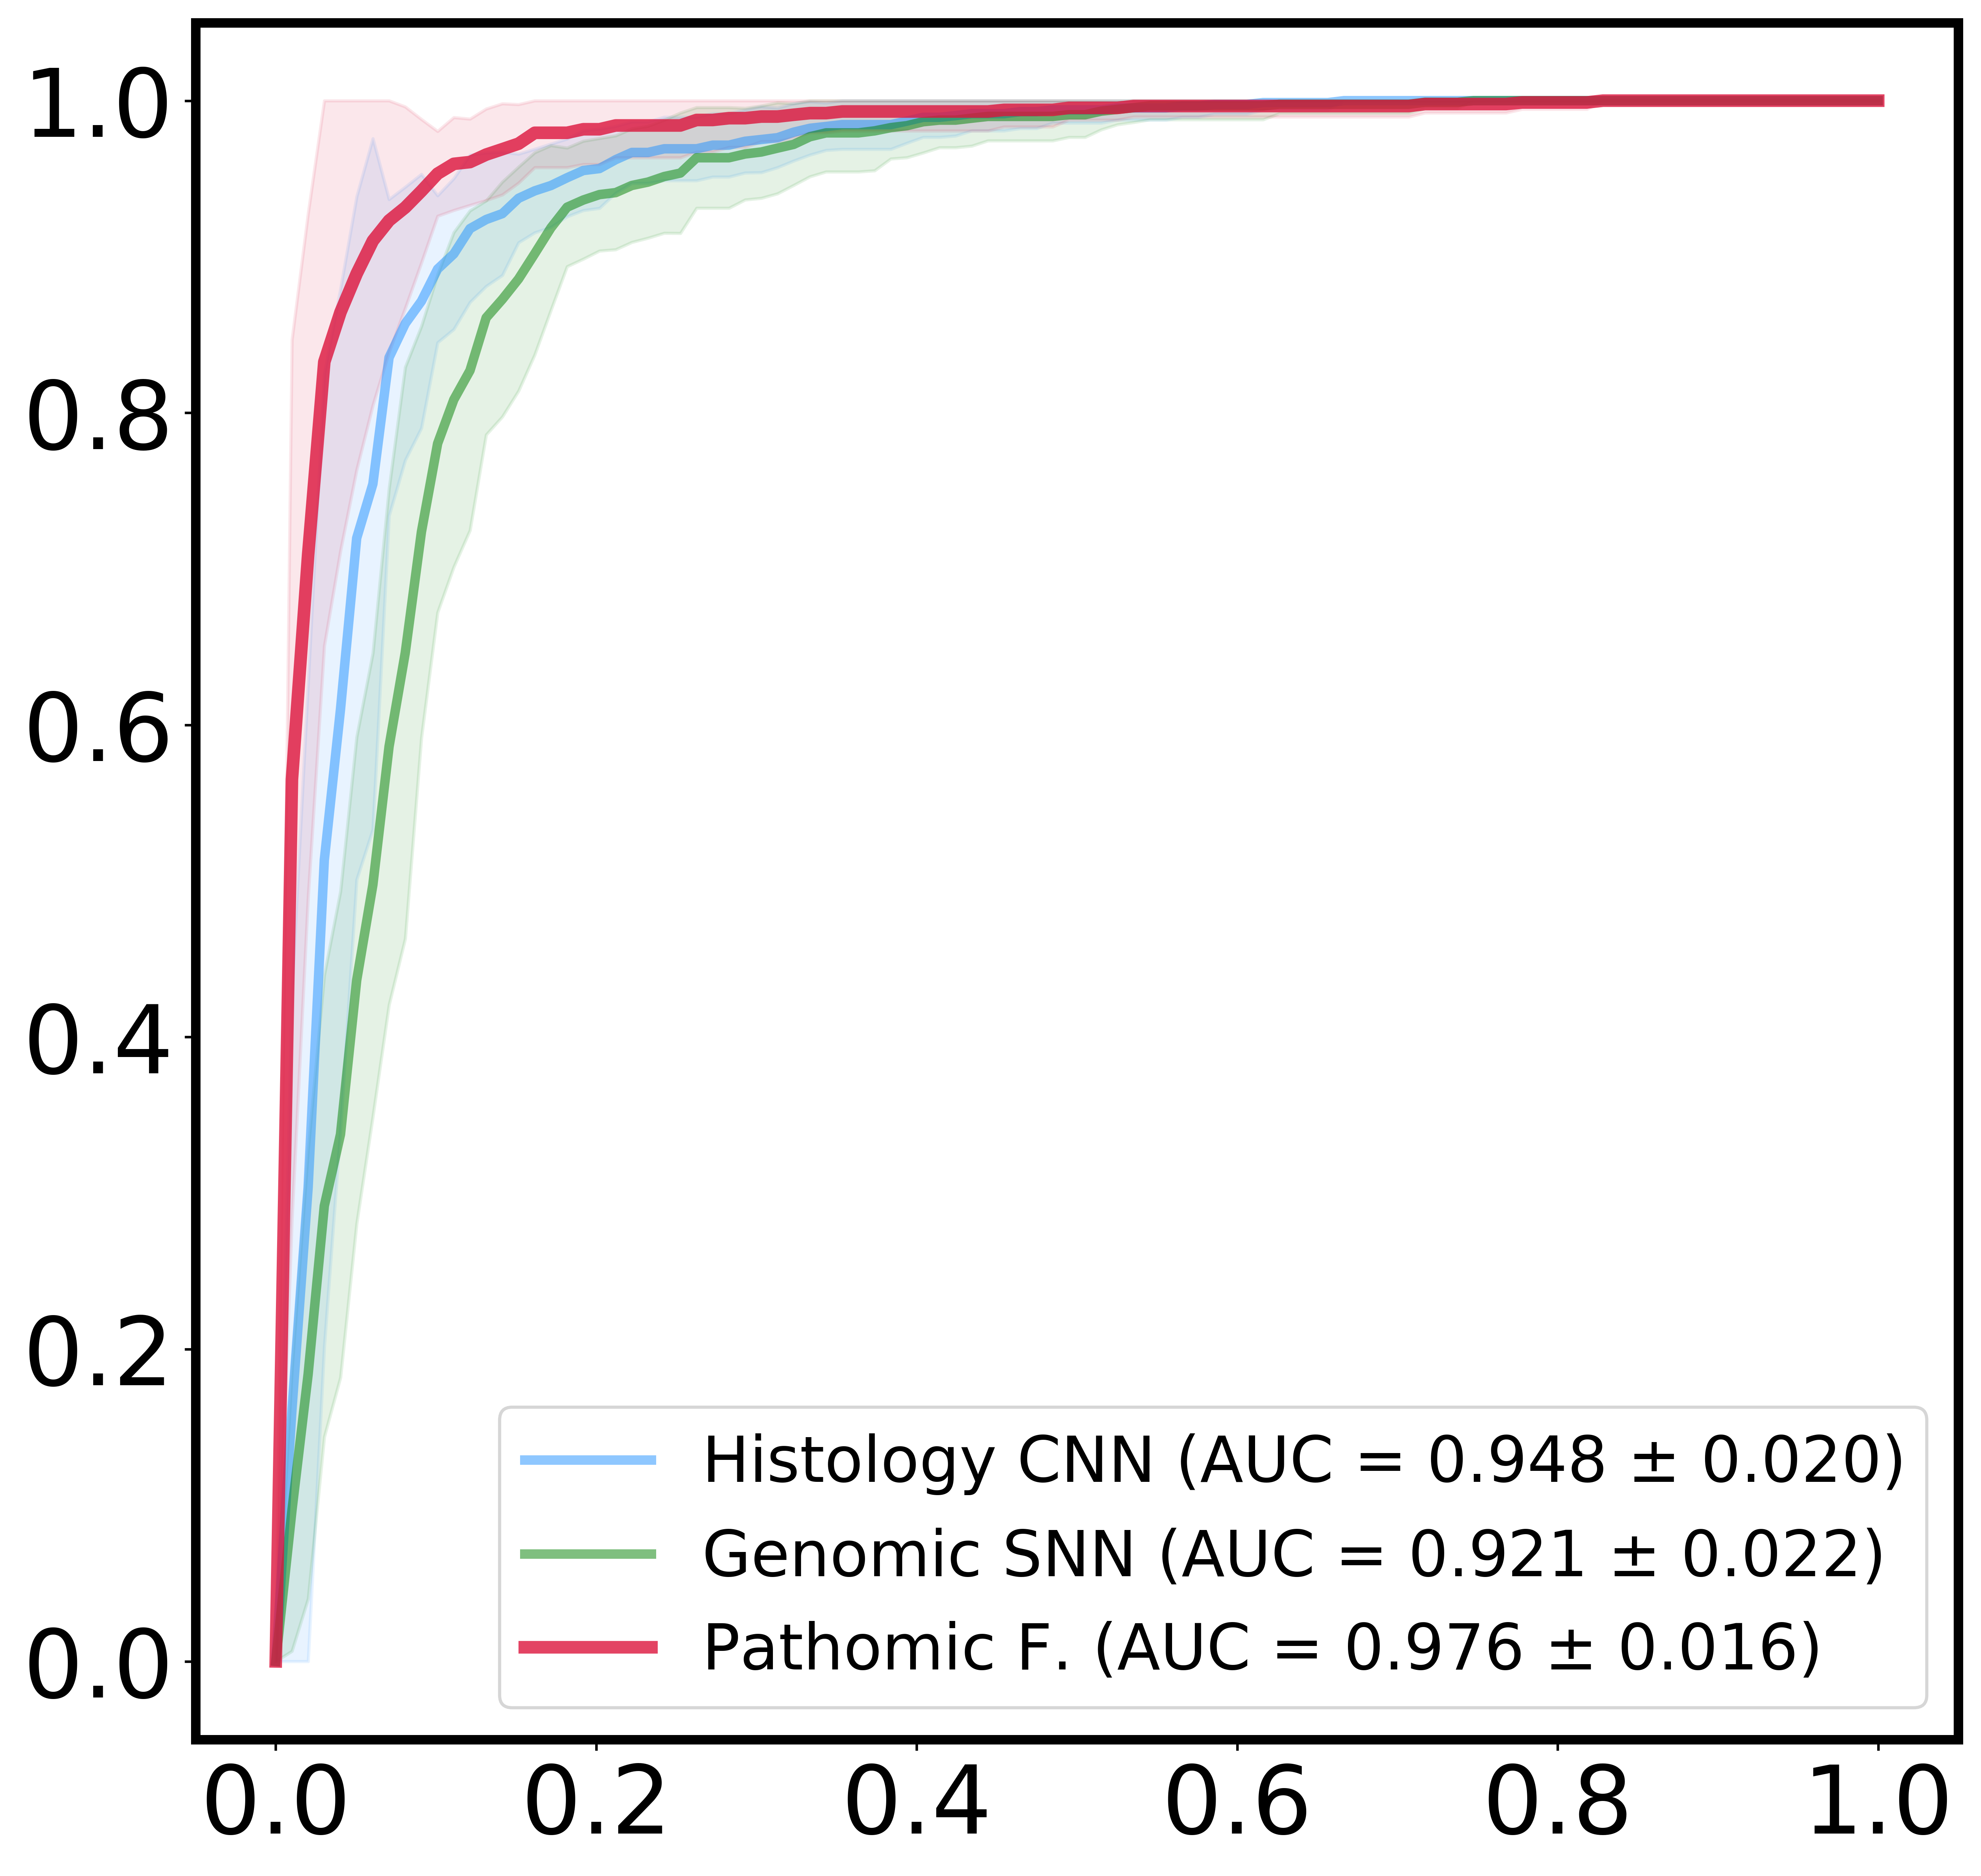

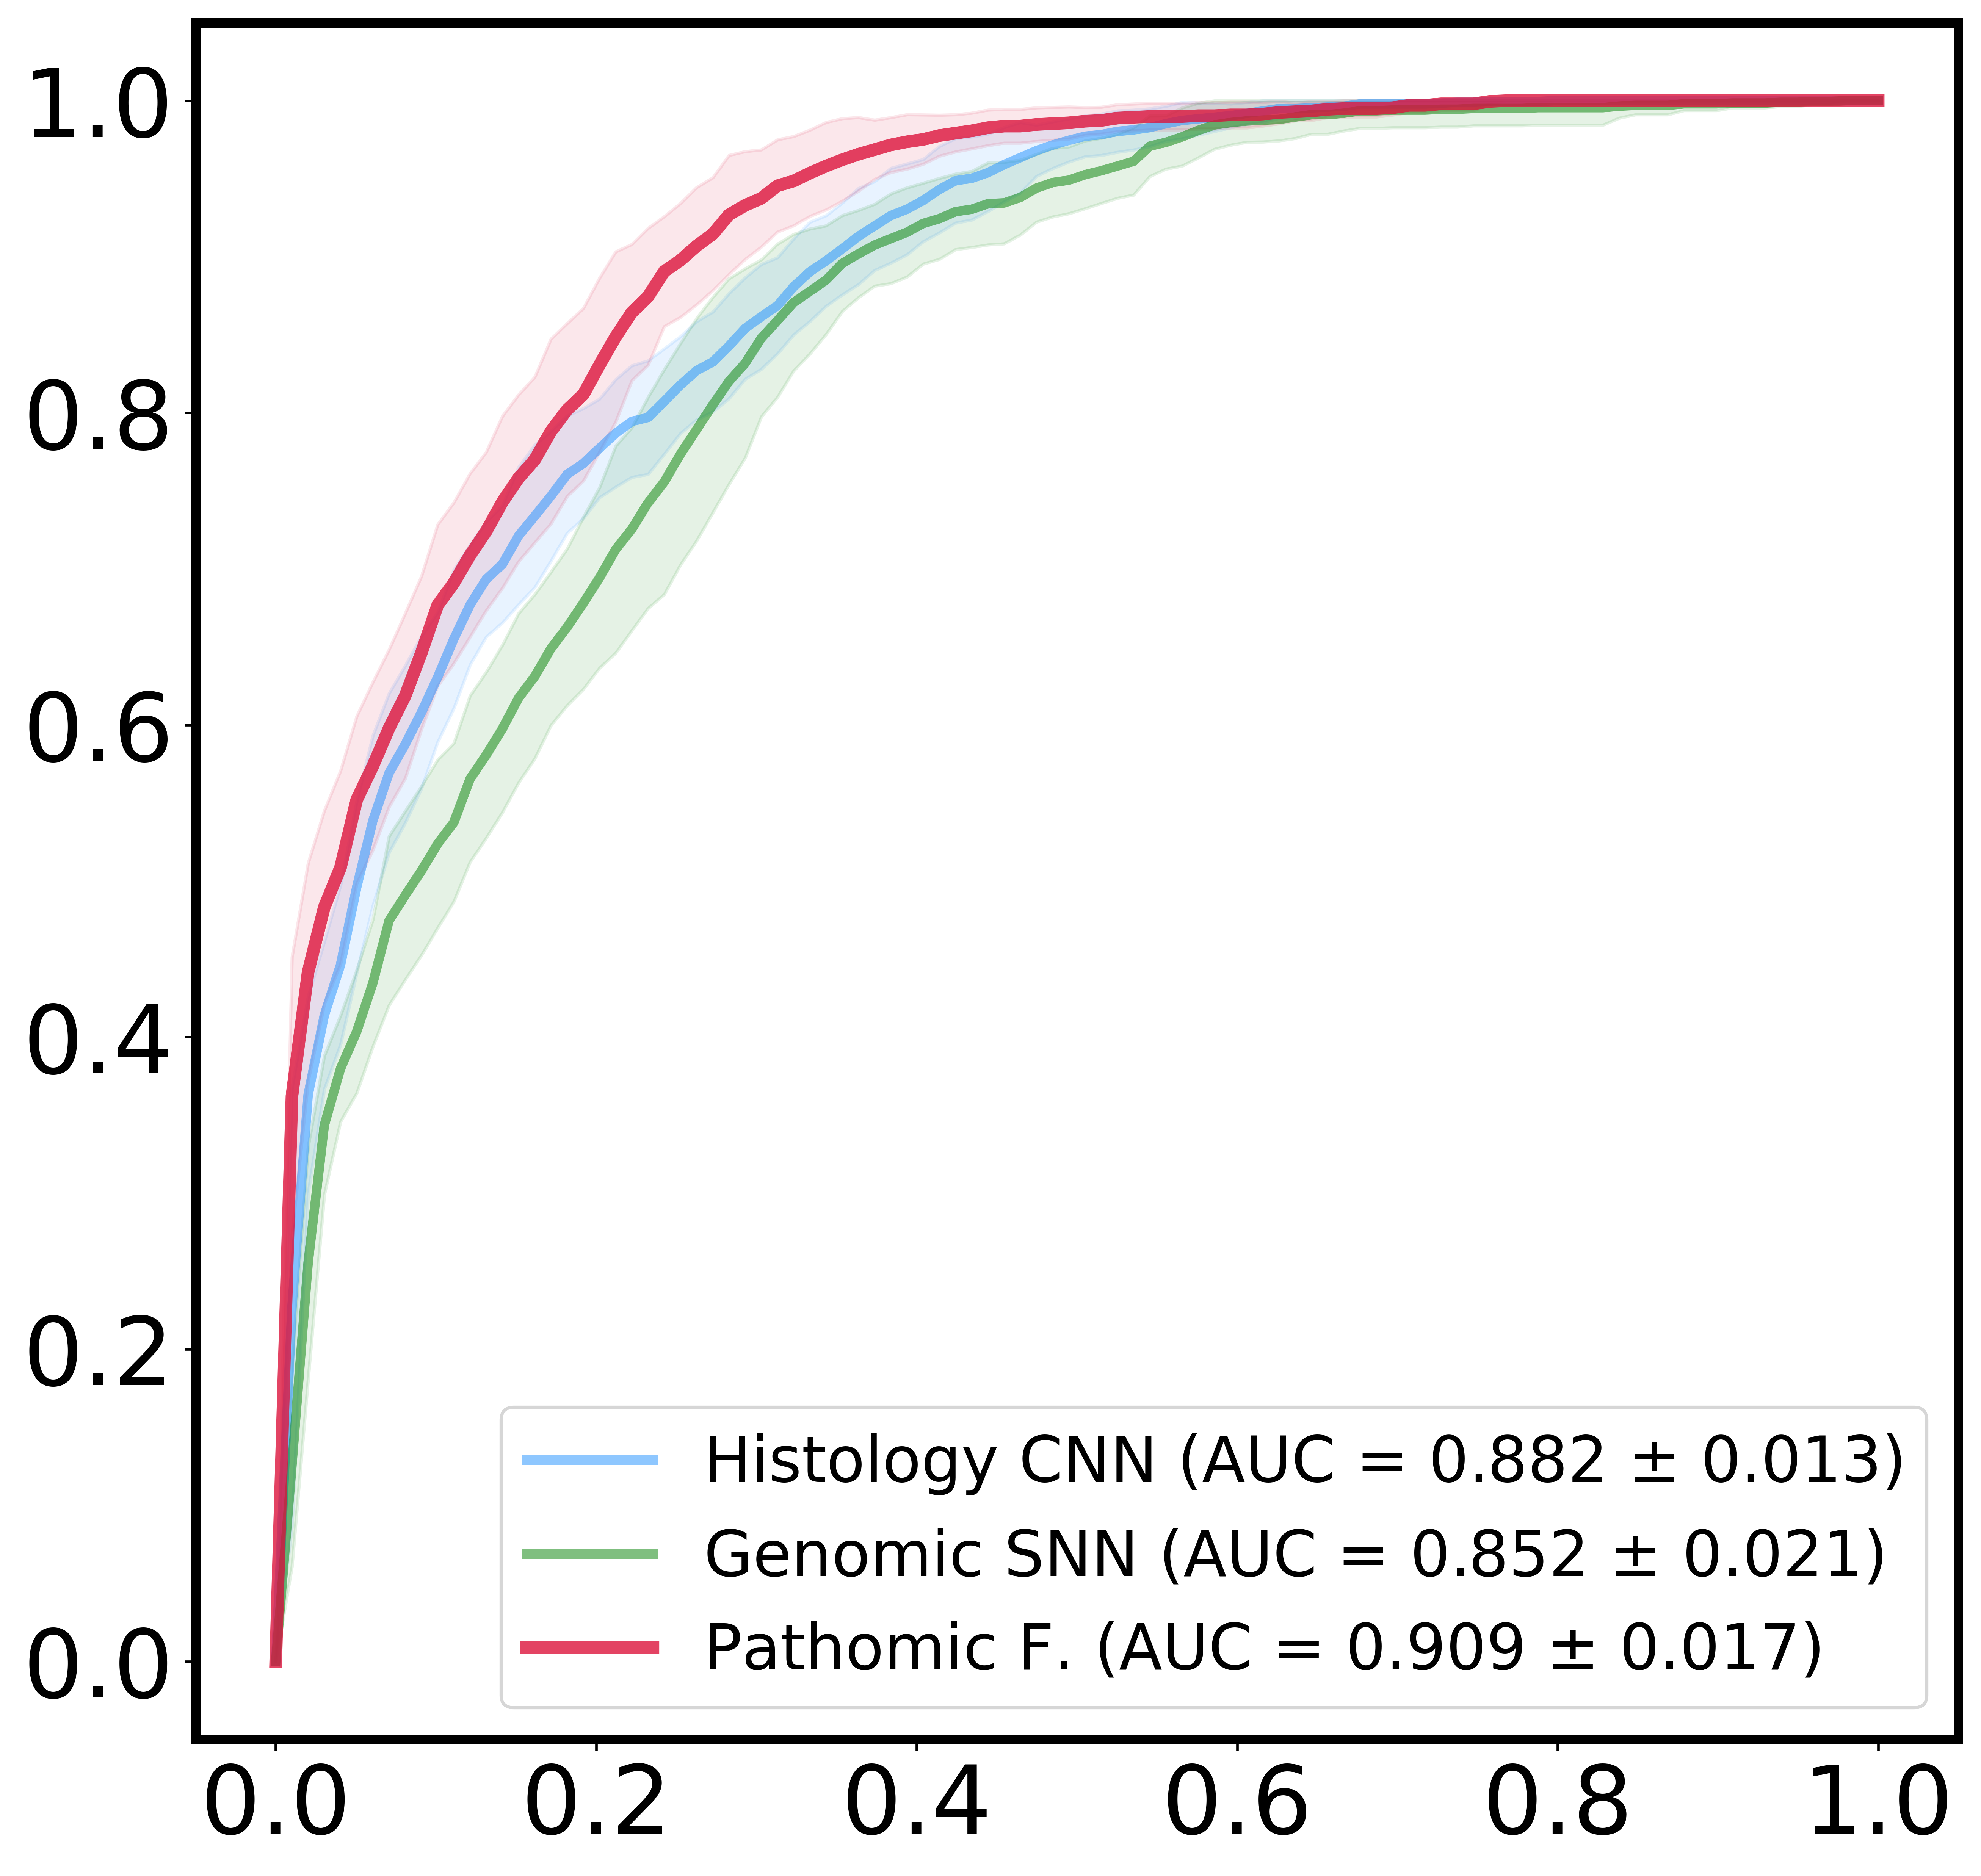

In [5]:
makeAUROCPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/grad_15/', model_list=['path', 'omic', 'pathgraphomic_fusion'])

# Glioma Survival Outcome Prediction

### 1. Cox Baselines

In [6]:
trainCox_GBMLGG(model='cox_agegender', penalizer=0)

# Missing Molecular Subtype: 72
# Missing IDH Mutation: 72
# Missing 1p19q Codeletion: 72
# Missing Histological Subtype: 33
# Missing Grade: 33
C-Indices across Splits [0.7147273749297358, 0.7541977611940298, 0.7130471859010802, 0.7310171356704921, 0.7507861635220126, 0.7054662379421222, 0.7450995889977869, 0.7210217626176879, 0.7041129032258064, 0.7815342837746097, 0.7158008268919648, 0.7386735170481084, 0.7499293785310734, 0.725032637075718, 0.7236298932384342]
Average C-Index: 0.7316 ± 0.012


In [7]:
trainCox_GBMLGG(model='cox_moltype', penalizer=0)

# Missing Molecular Subtype: 72
# Missing IDH Mutation: 72
# Missing 1p19q Codeletion: 72
# Missing Histological Subtype: 33
# Missing Grade: 33
C-Indices across Splits [0.7472989195678271, 0.7591567291311755, 0.7115270350564468, 0.7548087085182836, 0.742553983618764, 0.7573443008225617, 0.7746492408226023, 0.7667284522706209, 0.796311391889138, 0.7691740412979351, 0.7644585987261147, 0.7482376636455186, 0.7606010703993413, 0.7565323070690703, 0.7835834226509467]
Average C-Index: 0.7595 ± 0.011


In [5]:
trainCox_GBMLGG(model='cox_grade', penalizer=0)

# Missing Molecular Subtype: 72
# Missing IDH Mutation: 72
# Missing 1p19q Codeletion: 72
# Missing Histological Subtype: 33
# Missing Grade: 33
C-Indices across Splits [0.7134590995561192, 0.7231285988483686, 0.7055277859453102, 0.7338403041825095, 0.7070940170940171, 0.7394244105409153, 0.7776695877961701, 0.7350643008302132, 0.7878787878787878, 0.7458748327634904, 0.7300304298212248, 0.740462023101155, 0.7244370054777846, 0.7619384506544039, 0.7427146024707]
Average C-Index: 0.7379 ± 0.013


In [6]:
trainCox_GBMLGG(model='cox_molgrade', penalizer=0)

# Missing Molecular Subtype: 72
# Missing IDH Mutation: 72
# Missing 1p19q Codeletion: 72
# Missing Histological Subtype: 33
# Missing Grade: 33
C-Indices across Splits [0.7467735627688697, 0.7829857299670692, 0.7410034957844952, 0.7757697456492637, 0.7578443357783211, 0.7740394820632562, 0.8179573291189254, 0.7909964692036092, 0.8236830648672181, 0.7919983670136762, 0.7744778953078384, 0.7514867337602927, 0.7710573476702509, 0.7828816920026438, 0.7699017445357931]
Average C-Index: 0.7769 ± 0.013


### 2. Statistical Significance + Ensembling Effects in Pathomic Fusion

In [6]:
models = ['cox_agegender', 'cox_moltype', 'cox_grade', 'cox_molgrade',
          'omic', 'omicomic_fusion', 
          'graph', 'graphgraph_fusion', 
          'path', 'pathpath_fusion', 
          'pathomic_fusion', 'graphomic_fusion', 'pathgraphomic_fusion','agg_pathomic_fusion','agg_graphomic_fusion','agg_pathgraphomic_fusion']
model_names = ['Cox (Age+Gender)', 'Cox (Subtype)', 'Cox (Grade)', 'Cox (Grade+Subtype)',
               'Genomic SNN', 'Genomic (SNN + SNN)',
               'Histology GCN', 'Histology (GCN + GCN)',
               'Histology CNN', 'Histology (CNN + CNN)',
               'Pathomic F. (CNN+SNN)', 'Pathomic F. (GCN+SNN)', 
               'Pathomic F. (CNN+GCN+SNN)','Pathomic F. (CNN+SNN) (CNN Aggregate)','Pathomic F. (GCN+SNN) (GCN Aggregate)','Pathomic F. (CNN+GCN+SNN) (CNN + GCN Aggregate)']

In [7]:
ckpt_name = './checkpoints/TCGA_GBMLGG/surv_15_rnaseq/'
pvalue_surv_multi = [np.array(getPValAggSurv_GBMLGG_Multi(ckpt_name=ckpt_name, model=model, percentile=[33,66])) for model in tqdm(models)]
pvalue_surv_multi = pd.DataFrame(np.array(pvalue_surv_multi))
pvalue_surv_binary = [np.array(getPValAggSurv_GBMLGG_Binary(ckpt_name=ckpt_name, model=model, percentile=[50])) for model in tqdm(models)]
pvalue_surv_binary = pd.DataFrame(np.array(pvalue_surv_binary))
pvalue_surv = pd.concat([pvalue_surv_binary, pvalue_surv_multi],axis=1)
pvalue_surv.index = model_names
pvalue_surv.columns = ['P-Value (<50% vs. >50%)', 'P-Value (<33% vs. 33-66%)', 'P-Value (33-66% vs. >66%)']

cv_surv = [np.array(getPredAggSurv_GBMLGG(ckpt_name=ckpt_name, model=model)) for model in tqdm(models)]
cv_surv = pd.DataFrame(np.array(cv_surv))
cv_surv.columns = ['Split %s' % str(k) for k in range(1,16)]
cv_surv.index = model_names
cv_surv['C-Index'] = [CI_pm(cv_surv.loc[model]) for model in model_names]

# cv_surv.insert(0, 'Hazard Aggregate', hazard_aggregate)

cv_surv_all = cv_surv[['C-Index']].join(pvalue_surv, how='inner')

 31%|███▏      | 5/16 [00:00<00:00, 33.77it/s]

./checkpoints/TCGA_GBMLGG/surv_15_rnaseq//omic/omic_1_pred_test.pkl
./checkpoints/TCGA_GBMLGG/surv_15_rnaseq//omicomic_fusion/omicomic_fusion_1_pred_test.pkl
./checkpoints/TCGA_GBMLGG/surv_15_rnaseq//graph/graph_1_patch_pred_test.pkl
./checkpoints/TCGA_GBMLGG/surv_15_rnaseq//graphgraph_fusion/graphgraph_fusion_1_patch_pred_test.pkl


 56%|█████▋    | 9/16 [00:00<00:00, 12.33it/s]

./checkpoints/TCGA_GBMLGG/surv_15_rnaseq//path/path_1_patch_pred_test.pkl
./checkpoints/TCGA_GBMLGG/surv_15_rnaseq//pathpath_fusion/pathpath_fusion_1_patch_pred_test.pkl


 69%|██████▉   | 11/16 [00:01<00:00,  9.17it/s]

./checkpoints/TCGA_GBMLGG/surv_15_rnaseq//pathomic_fusion/pathomic_fusion_1_patch_pred_test.pkl
./checkpoints/TCGA_GBMLGG/surv_15_rnaseq//graphomic_fusion/graphomic_fusion_1_patch_pred_test.pkl


 81%|████████▏ | 13/16 [00:01<00:00,  7.07it/s]

./checkpoints/TCGA_GBMLGG/surv_15_rnaseq//pathgraphomic_fusion/pathgraphomic_fusion_1_patch_pred_test.pkl


 88%|████████▊ | 14/16 [00:01<00:00,  5.31it/s]

./checkpoints/TCGA_GBMLGG/surv_15_rnaseq//agg_pathomic_fusion/agg_pathomic_fusion_1_patch_pred_test.pkl


 94%|█████████▍| 15/16 [00:02<00:00,  4.27it/s]

./checkpoints/TCGA_GBMLGG/surv_15_rnaseq//agg_graphomic_fusion/agg_graphomic_fusion_1_patch_pred_test.pkl


100%|██████████| 16/16 [00:02<00:00,  5.83it/s]

./checkpoints/TCGA_GBMLGG/surv_15_rnaseq//agg_pathgraphomic_fusion/agg_pathgraphomic_fusion_1_patch_pred_test.pkl


In [8]:
cv_surv

Split 1   Split 2   Split 3  \
Cox (Age+Gender)                                 0.714727  0.754198  0.713047   
Cox (Subtype)                                    0.747299  0.759157  0.711527   
Cox (Grade)                                      0.713459  0.723129  0.705528   
Cox (Grade+Subtype)                              0.746774  0.782986  0.741003   
Genomic SNN                                      0.785714  0.803239  0.772381   
Genomic (SNN + SNN)                              0.765886  0.790342  0.756825   
Histology GCN                                    0.792164  0.785243  0.683175   
Histology (GCN + GCN)                            0.763497  0.781644  0.660317   
Histology CNN                                    0.806020  0.805639  0.726349   
Histology (CNN + CNN)                            0.794075  0.802040  0.739683   
Pathomic F. (CNN+SNN)                            0.820592  0.816737  0.794286   
Pathomic F. (GCN+SNN)                            0.812470  0.802340  0.768254   
Pathomic F. (CNN+GCN+SNN)                        0.824176  0.817037  0.780635   
Pathomic F. (CNN+SNN) (CNN Aggregate)            0.834209  0.826635  0.800000   
Pathomic F. (GCN+SNN) (GCN Aggregate)            0.830387  0.835633  0.781905   
Pathomic F. (CNN+GCN+SNN) (CNN + GCN Aggregate)  0.831820  0.823935  0.789206   

                                                  Split 4   Split 5   Split 6  \
Cox (Age+Gender)                                 0.731017  0.750786  0.705466   
Cox (Subtype)                                    0.754809  0.742554  0.757344   
Cox (Grade)                                      0.733840  0.707094  0.739424   
Cox (Grade+Subtype)                              0.775770  0.757844  0.774039   
Genomic SNN                                      0.813590  0.791988  0.816837   
Genomic (SNN + SNN)                              0.783794  0.777151  0.803470   
Histology GCN                                    0.768895  0.735905  0.674630   
Histology (GCN + GCN)                            0.776890  0.730564  0.664960   
Histology CNN                                    0.812500  0.763205  0.772469   
Histology (CNN + CNN)                            0.816860  0.760831  0.777588   
Pathomic F. (CNN+SNN)                            0.827398  0.780415  0.812287   
Pathomic F. (GCN+SNN)                            0.803779  0.790504  0.820819   
Pathomic F. (CNN+GCN+SNN)                        0.832122  0.782789  0.826792   
Pathomic F. (CNN+SNN) (CNN Aggregate)            0.833576  0.798220  0.827076   
Pathomic F. (GCN+SNN) (GCN Aggregate)            0.842660  0.799703  0.821104   
Pathomic F. (CNN+GCN+SNN) (CNN + GCN Aggregate)  0.857558  0.800297  0.829352   

                                                  Split 7   Split 8   Split 9  \
Cox (Age+Gender)                                 0.745100  0.721022  0.704113   
Cox (Subtype)                                    0.774649  0.766728  0.796311   
Cox (Grade)                                      0.777670  0.735064  0.787879   
Cox (Grade+Subtype)                              0.817957  0.790996  0.823683   
Genomic SNN                                      0.809727  0.843336  0.814352   
Genomic (SNN + SNN)                              0.793515  0.807149  0.811447   
Histology GCN                                    0.777019  0.750662  0.763510   
Histology (GCN + GCN)                            0.798635  0.738526  0.761185   
Histology CNN                                    0.831058  0.802736  0.776293   
Histology (CNN + CNN)                            0.833333  0.809797  0.769320   
Pathomic F. (CNN+SNN)                            0.816837  0.836496  0.828588   
Pathomic F. (GCN+SNN)                            0.827076  0.835613  0.850378   
Pathomic F. (CNN+GCN+SNN)                        0.845848  0.838703  0.829750   
Pathomic F. (CNN+SNN) (CNN Aggregate)            0.841013  0.853486  0.841662   
Pathomic F. (GCN+SNN) (GCN Aggregate)            0.816268  0.875110  0.827135  

In [9]:
cv_surv_all

C-Index  \
Cox (Age+Gender)                                 0.7316 ± 0.012   
Cox (Subtype)                                    0.7595 ± 0.011   
Cox (Grade)                                      0.7379 ± 0.013   
Cox (Grade+Subtype)                              0.7769 ± 0.013   
Genomic SNN                                      0.8024 ± 0.017   
Genomic (SNN + SNN)                              0.7848 ± 0.012   
Histology GCN                                    0.7478 ± 0.019   
Histology (GCN + GCN)                            0.7374 ± 0.026   
Histology CNN                                    0.7955 ± 0.016   
Histology (CNN + CNN)                            0.7930 ± 0.014   
Pathomic F. (CNN+SNN)                            0.8205 ± 0.011   
Pathomic F. (GCN+SNN)                            0.8126 ± 0.014   
Pathomic F. (CNN+GCN+SNN)                        0.8254 ± 0.013   
Pathomic F. (CNN+SNN) (CNN Aggregate)            0.8318 ± 0.011   
Pathomic F. (GCN+SNN) (GCN Aggregate)            0.8239 ± 0.016   
Pathomic F. (CNN+GCN+SNN) (CNN + GCN Aggregate)  0.8361 ± 0.015   

                                                 P-Value (<50% vs. >50%)  \
Cox (Age+Gender)                                            1.900892e-92   
Cox (Subtype)                                              2.064634e-228   
Cox (Grade)                                                5.998349e-224   
Cox (Grade+Subtype)                                        5.291938e-215   
Genomic SNN                                                 7.880654e-53   
Genomic (SNN + SNN)                                         2.981644e-51   
Histology GCN                                               1.078225e-27   
Histology (GCN + GCN)                                       2.597619e-24   
Histology CNN                                               6.084860e-42   
Histology (CNN + CNN)                                       4.952793e-44   
Pathomic F. (CNN+SNN)                                       3.063464e-54   
Pathomic F. (GCN+SNN)                                       2.741404e-55   
Pathomic F. (CNN+GCN+SNN)                                   2.613508e-56   
Pathomic F. (CNN+SNN) (CNN Aggregate)                       2.057041e-60   
Pathomic F. (GCN+SNN) (GCN Aggregate)                       3.187957e-55   
Pathomic F. (CNN+GCN+SNN) (CNN + GCN Aggregate)             2.840066e-63   

                                                 P-Value (<33% vs. 33-66%)  \
Cox (Age+Gender)                                              1.475424e-38   
Cox (Subtype)                                                 3.856864e-26   
Cox (Grade)                                                   9.568192e-23   
Cox (Grade+Subtype)                                           1.140947e-40   
Genomic SNN                                                   7.693598e-01   
Genomic (SNN + SNN)                                                    NaN   
Histology GCN                                                 4.454646e-02   
Histology (GCN + GCN)                                         1.001645e-01   
Histology CNN                                                 1.710558e-05   
Histology (CNN + CNN)                                         1.093169e-06   
Pathomic F. (CNN+SNN)                                         7.541693e-02   
Pathomic F. (GCN+SNN)                                         8.164872e-02   
Pathomic F. (CNN+GCN+SNN)                                     1.439507e-02   
Pathomic F. (CNN+SNN) (CNN Aggregate)                         1.124984e-04   
Pathomic F. (GCN+SNN) (GCN Aggregate)                         5.784642e-02   
Pathomic F. (CNN+GCN+SNN) (CNN + GCN Aggregate)               5.125570e-02   

                                                 P-Value (33-66% vs. >66%)  
Cox (Age+Gender)                                              5.927583e-27  
Cox (Subtype)                                                 1.944605e-51  
Cox (Grade)                                                   2.9

### 3. Plots

Grade II (%)  Grade III (%)  Grade IV (%)  ODG (%)  \
Density Region                                                               
-1.00 < Hazard < -0.50         52.84          37.22          0.85    17.61   
0.00 < Hazard < 0.75           27.80          60.29          6.86    22.38   
1.00 < Hazard < 1.50            7.26          34.64         58.10     8.38   
-1.00 < Hazard < 0.00          46.35          42.06          2.54    19.84   
0.00 < Hazard < 1.00           24.61          49.53         16.51    21.81   
1.00 < Hazard < 1.50           14.84          34.62         46.15     9.89   
-1.00 < Hazard < -0.50         47.32          39.48          1.31    25.56   
1.00 < Hazard < 1.25           17.04          42.15         40.36     4.48   
1.25 < Hazard < 1.50           12.96          40.20         45.85     4.65   
-1.00 < Hazard < -0.50         46.62          39.21          1.53    25.93   
1.00 < Hazard < 1.25           11.22          45.92         42.35     2.04   
1.25 < Hazard < 1.50            9.57          37.23         52.66     1.60   
-1.00 < Hazard < -0.50         47.23          39.06          0.69    26.18   
1.00 < Hazard < 1.25           16.81          42.48         39.82     3.54   
1.25 < Hazard < 1.50            4.22          45.18         50.00     0.60   

                        IDHmut ATC (%)  IDHwt ATC (%)  
Density Region                                         
-1.00 < Hazard < -0.50           23.30           5.11  
0.00 < Hazard < 0.75             22.74          20.94  
1.00 < Hazard < 1.50             12.85          70.39  
-1.00 < Hazard < 0.00            19.84          12.06  
0.00 < Hazard < 1.00             19.00          27.10  
1.00 < Hazard < 1.50             11.54          57.14  
-1.00 < Hazard < -0.50           23.54           1.07  
1.00 < Hazard < 1.25             12.11          64.13  
1.25 < Hazard < 1.50              7.64          70.76  
-1.00 < Hazard < -0.50           22.73           1.15  
1.00 < Hazard < 1.25             10.20          69.90  
1.25 < Hazard < 1.50              5.85          80.32  
-1.00 < Hazard < -0.50           22.16           1.11  
1.00 < Hazard < 1.25              6.19          70.80  
1.25 < Hazard < 1.50              2.41          83.13

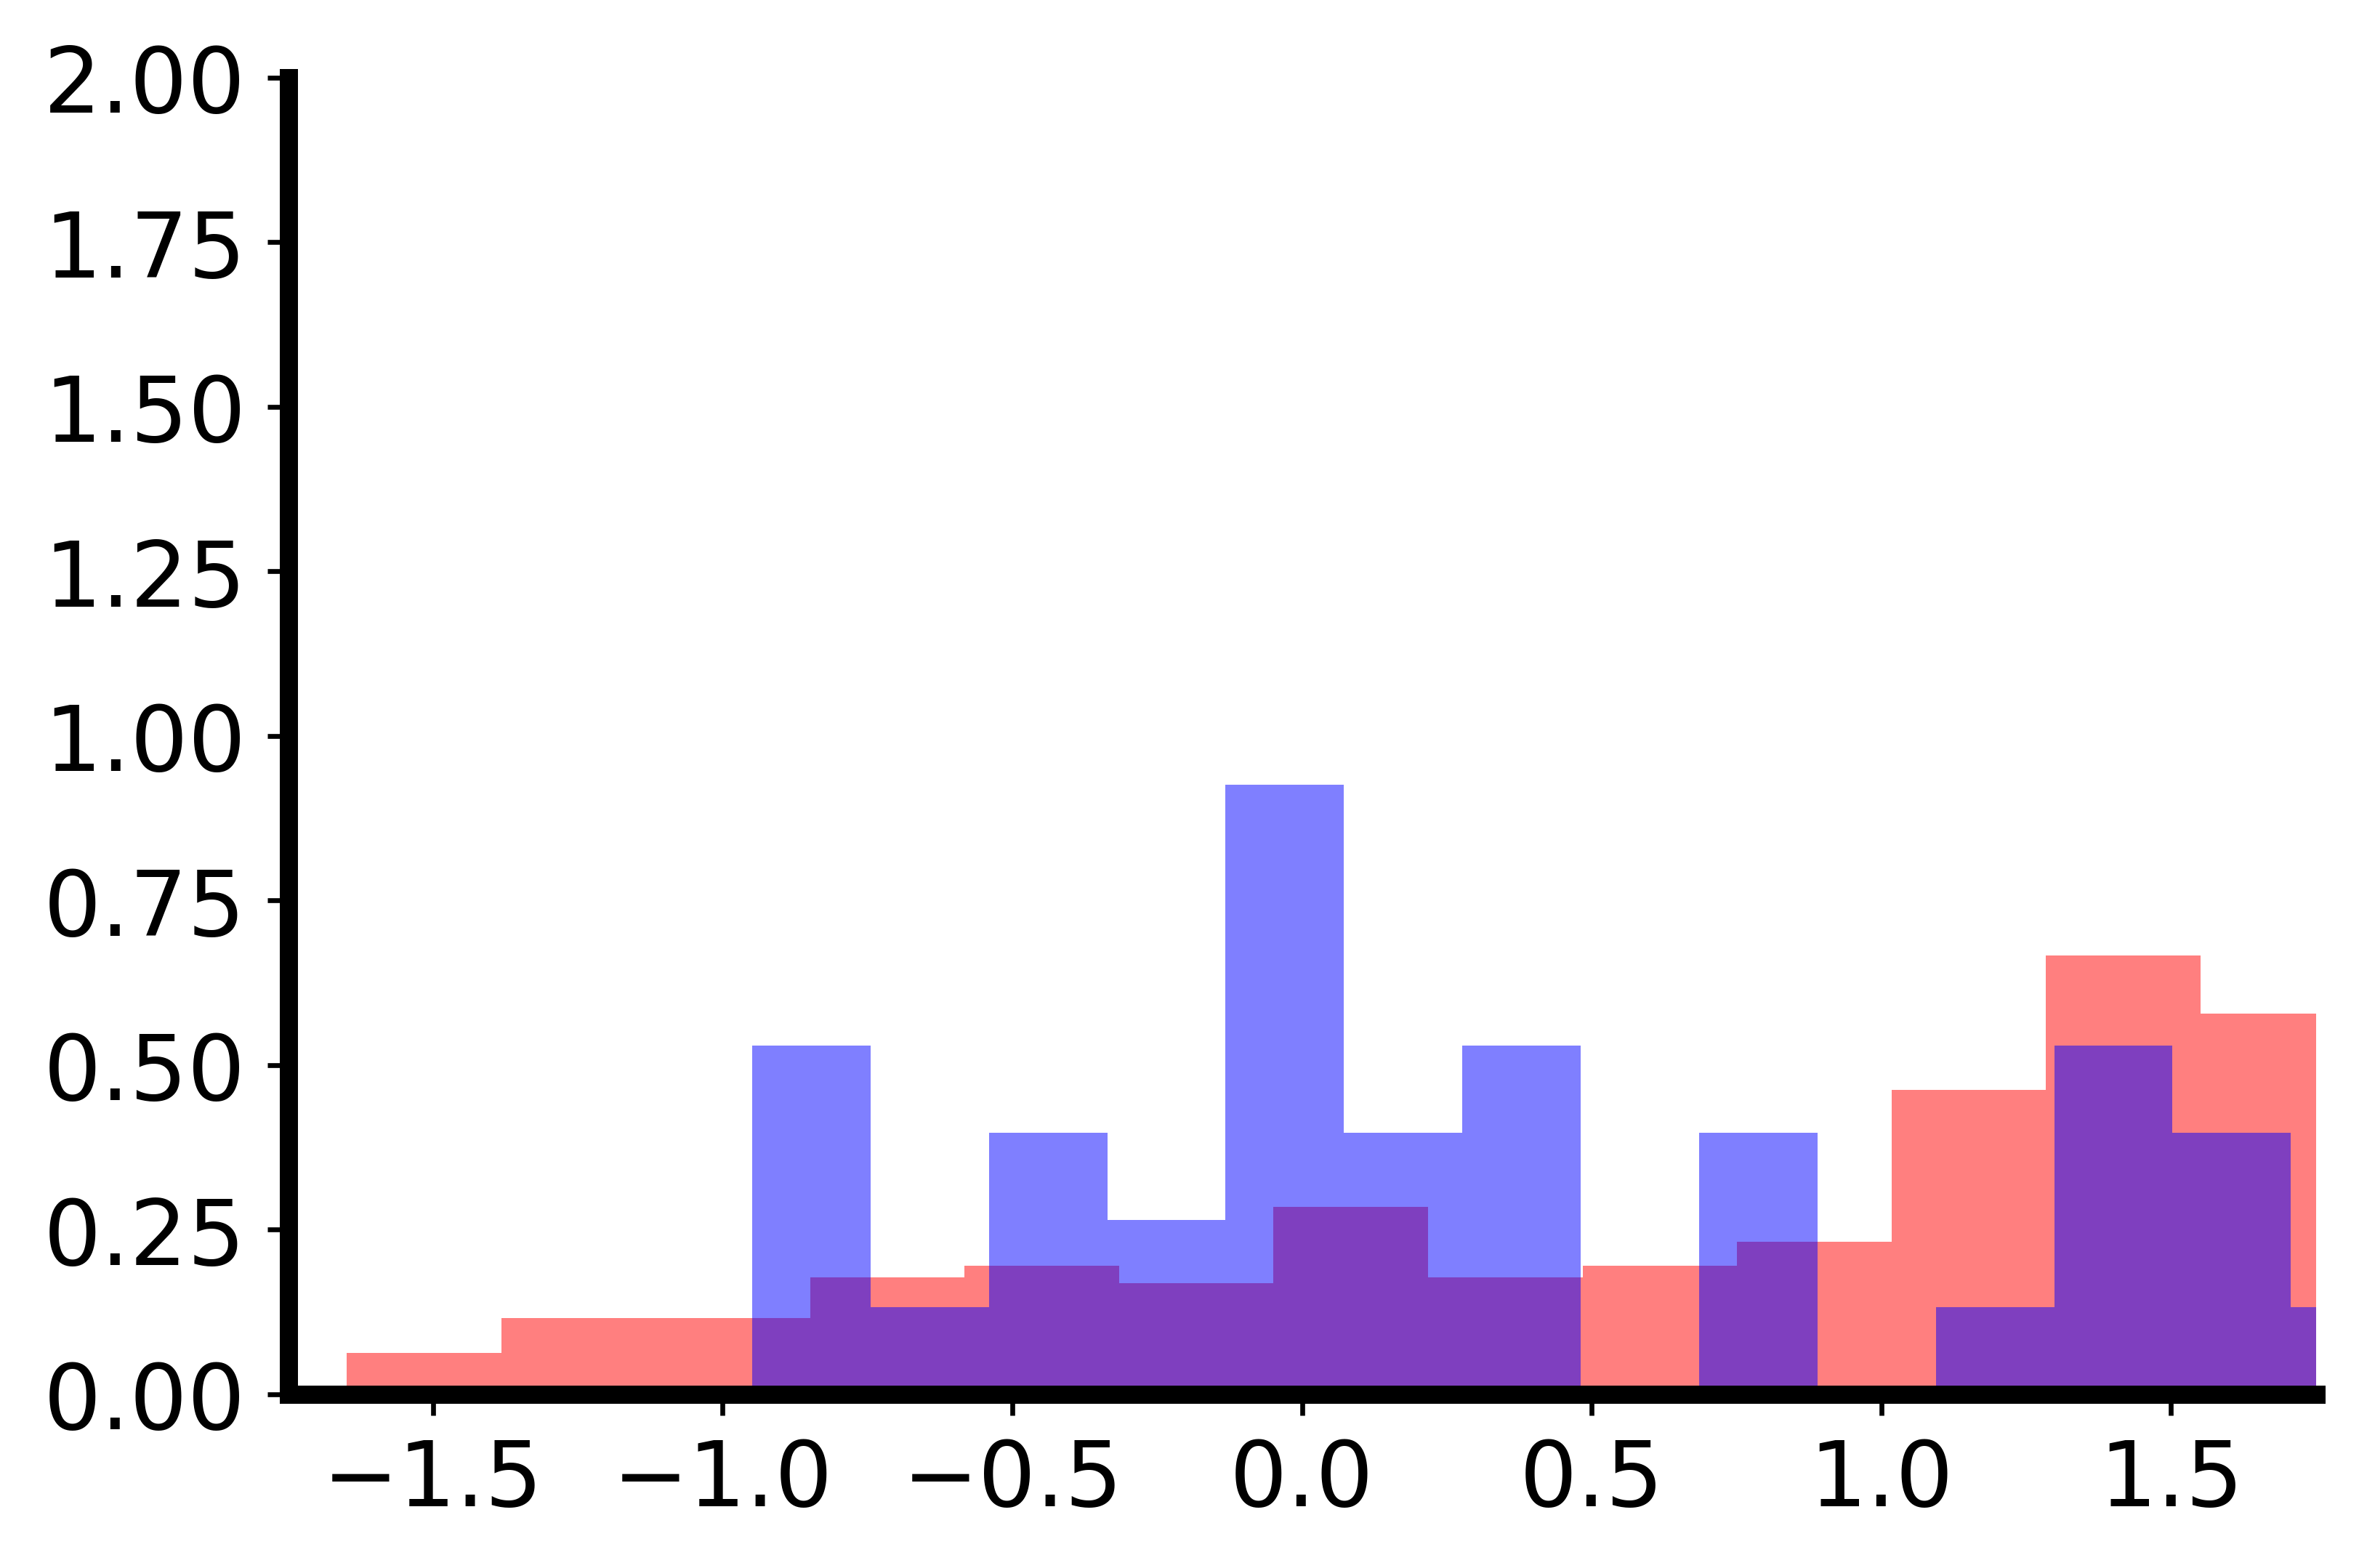

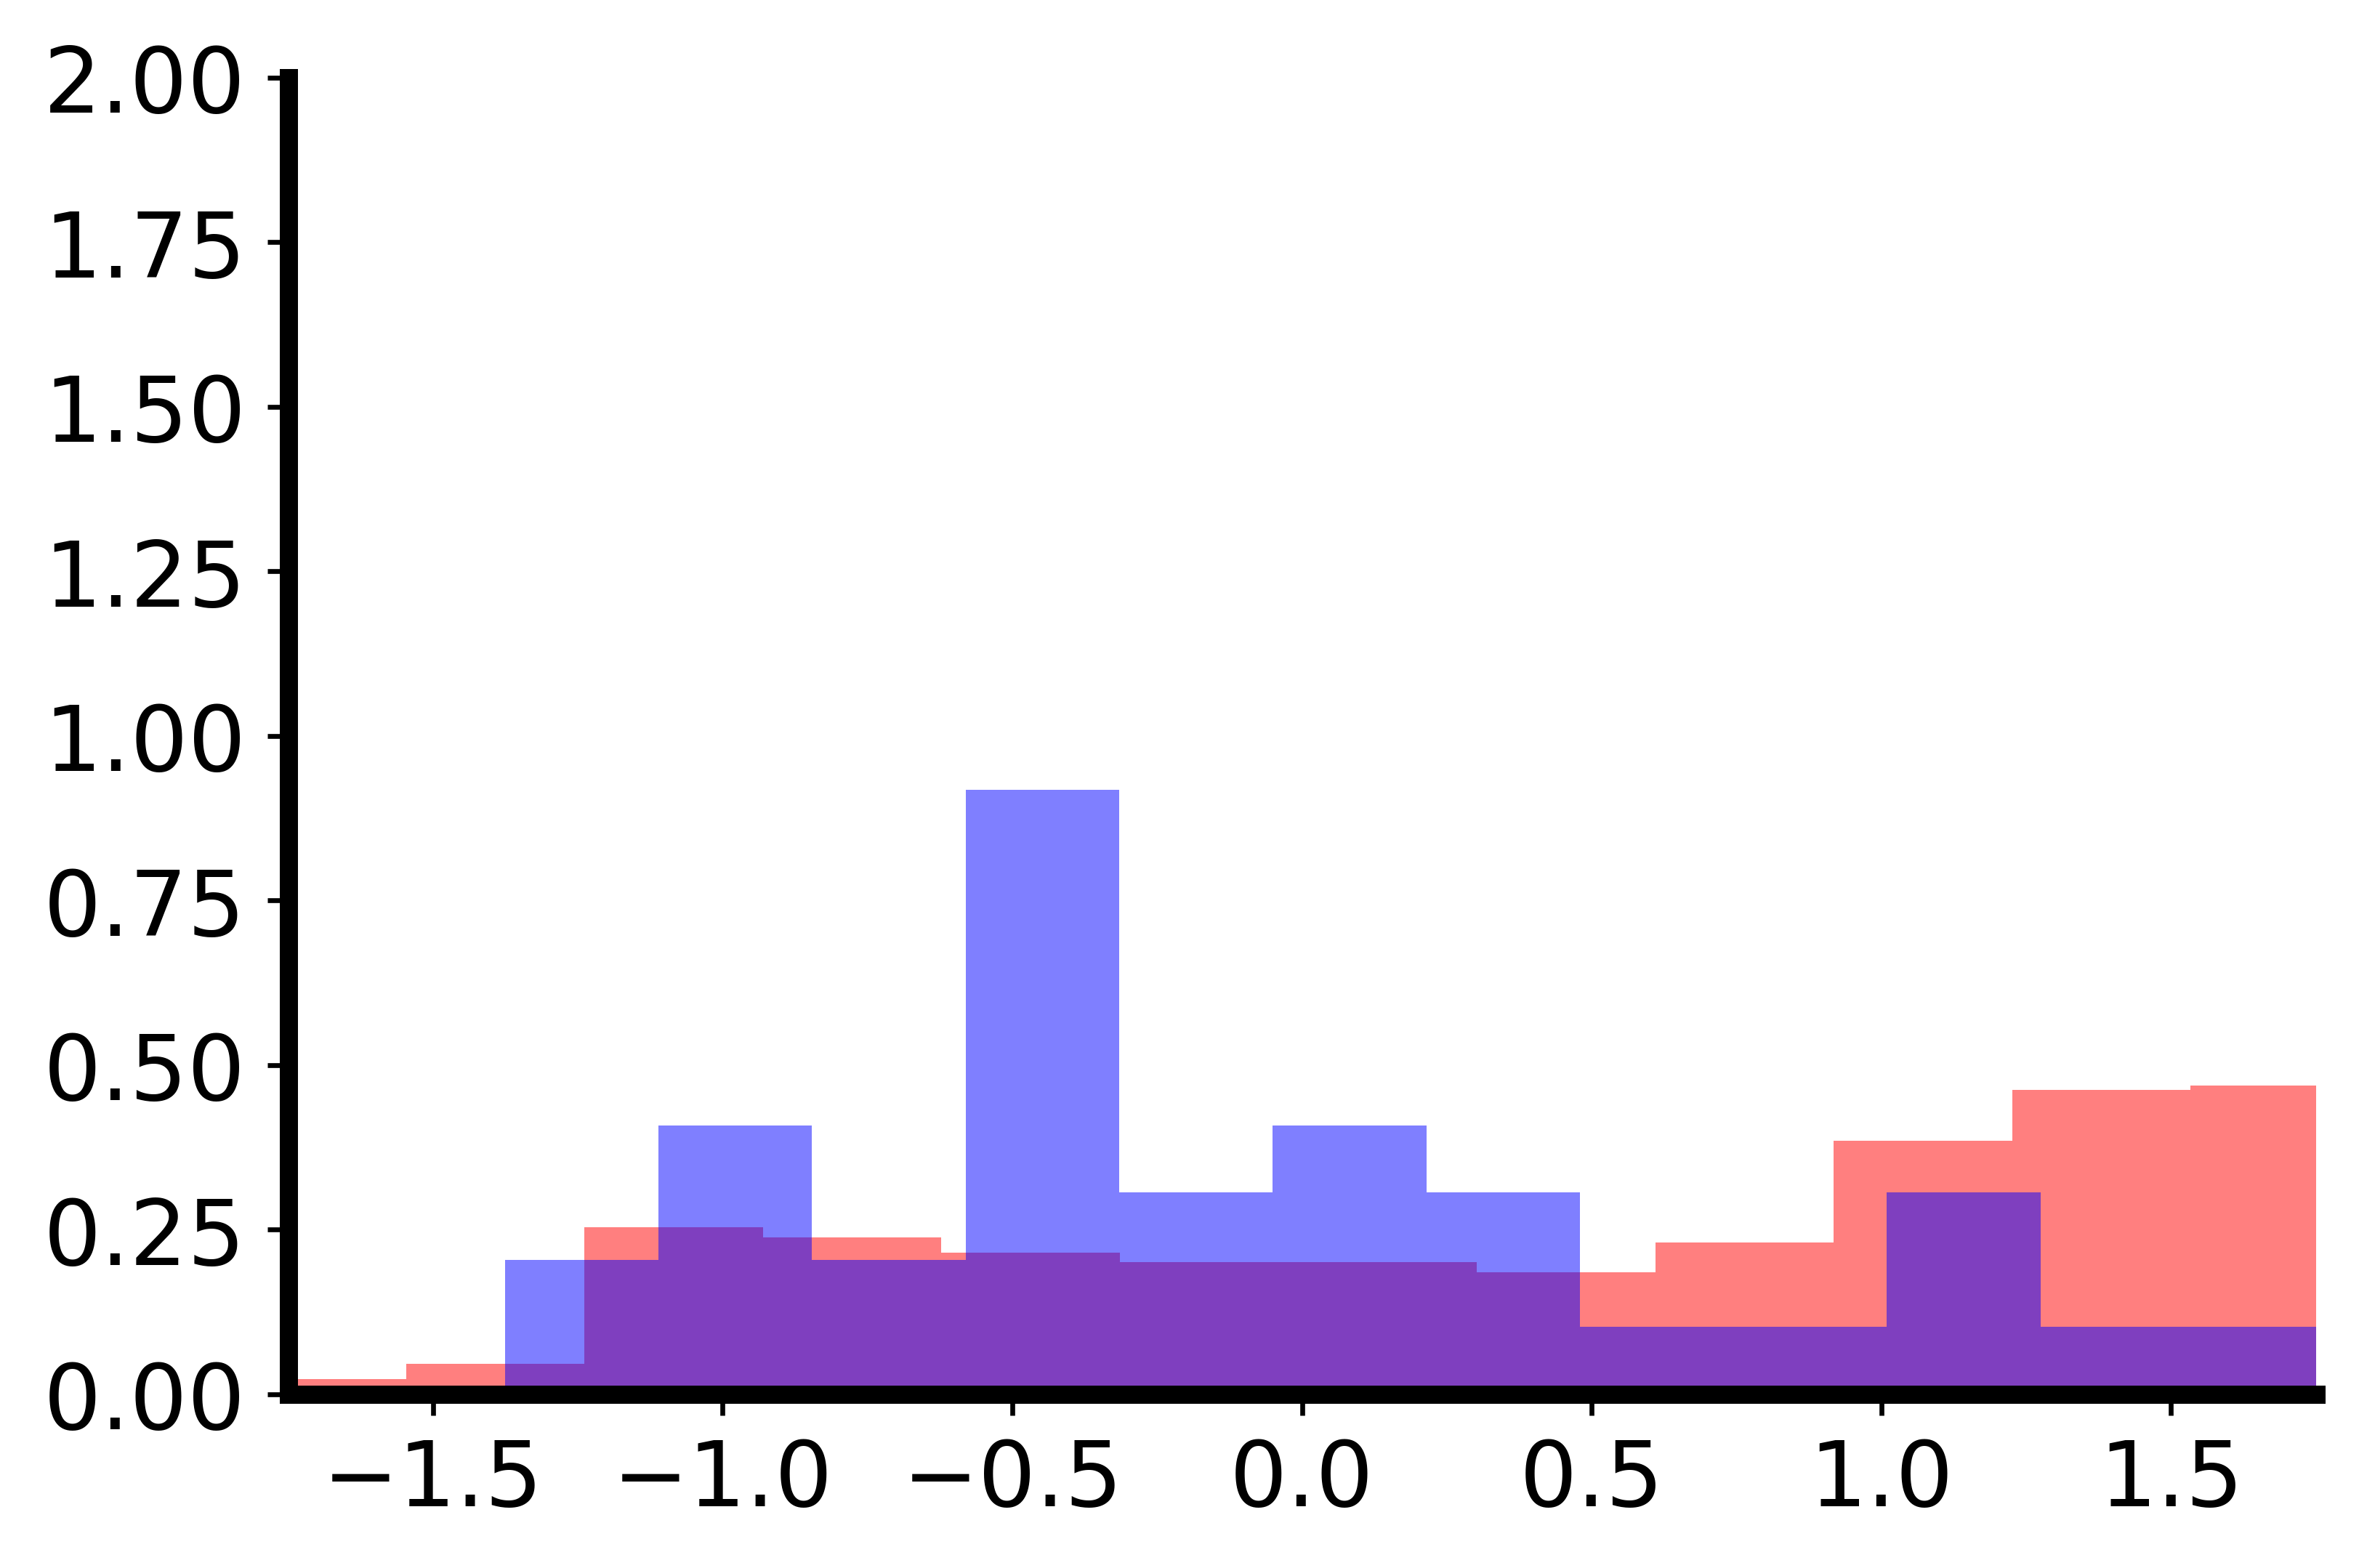

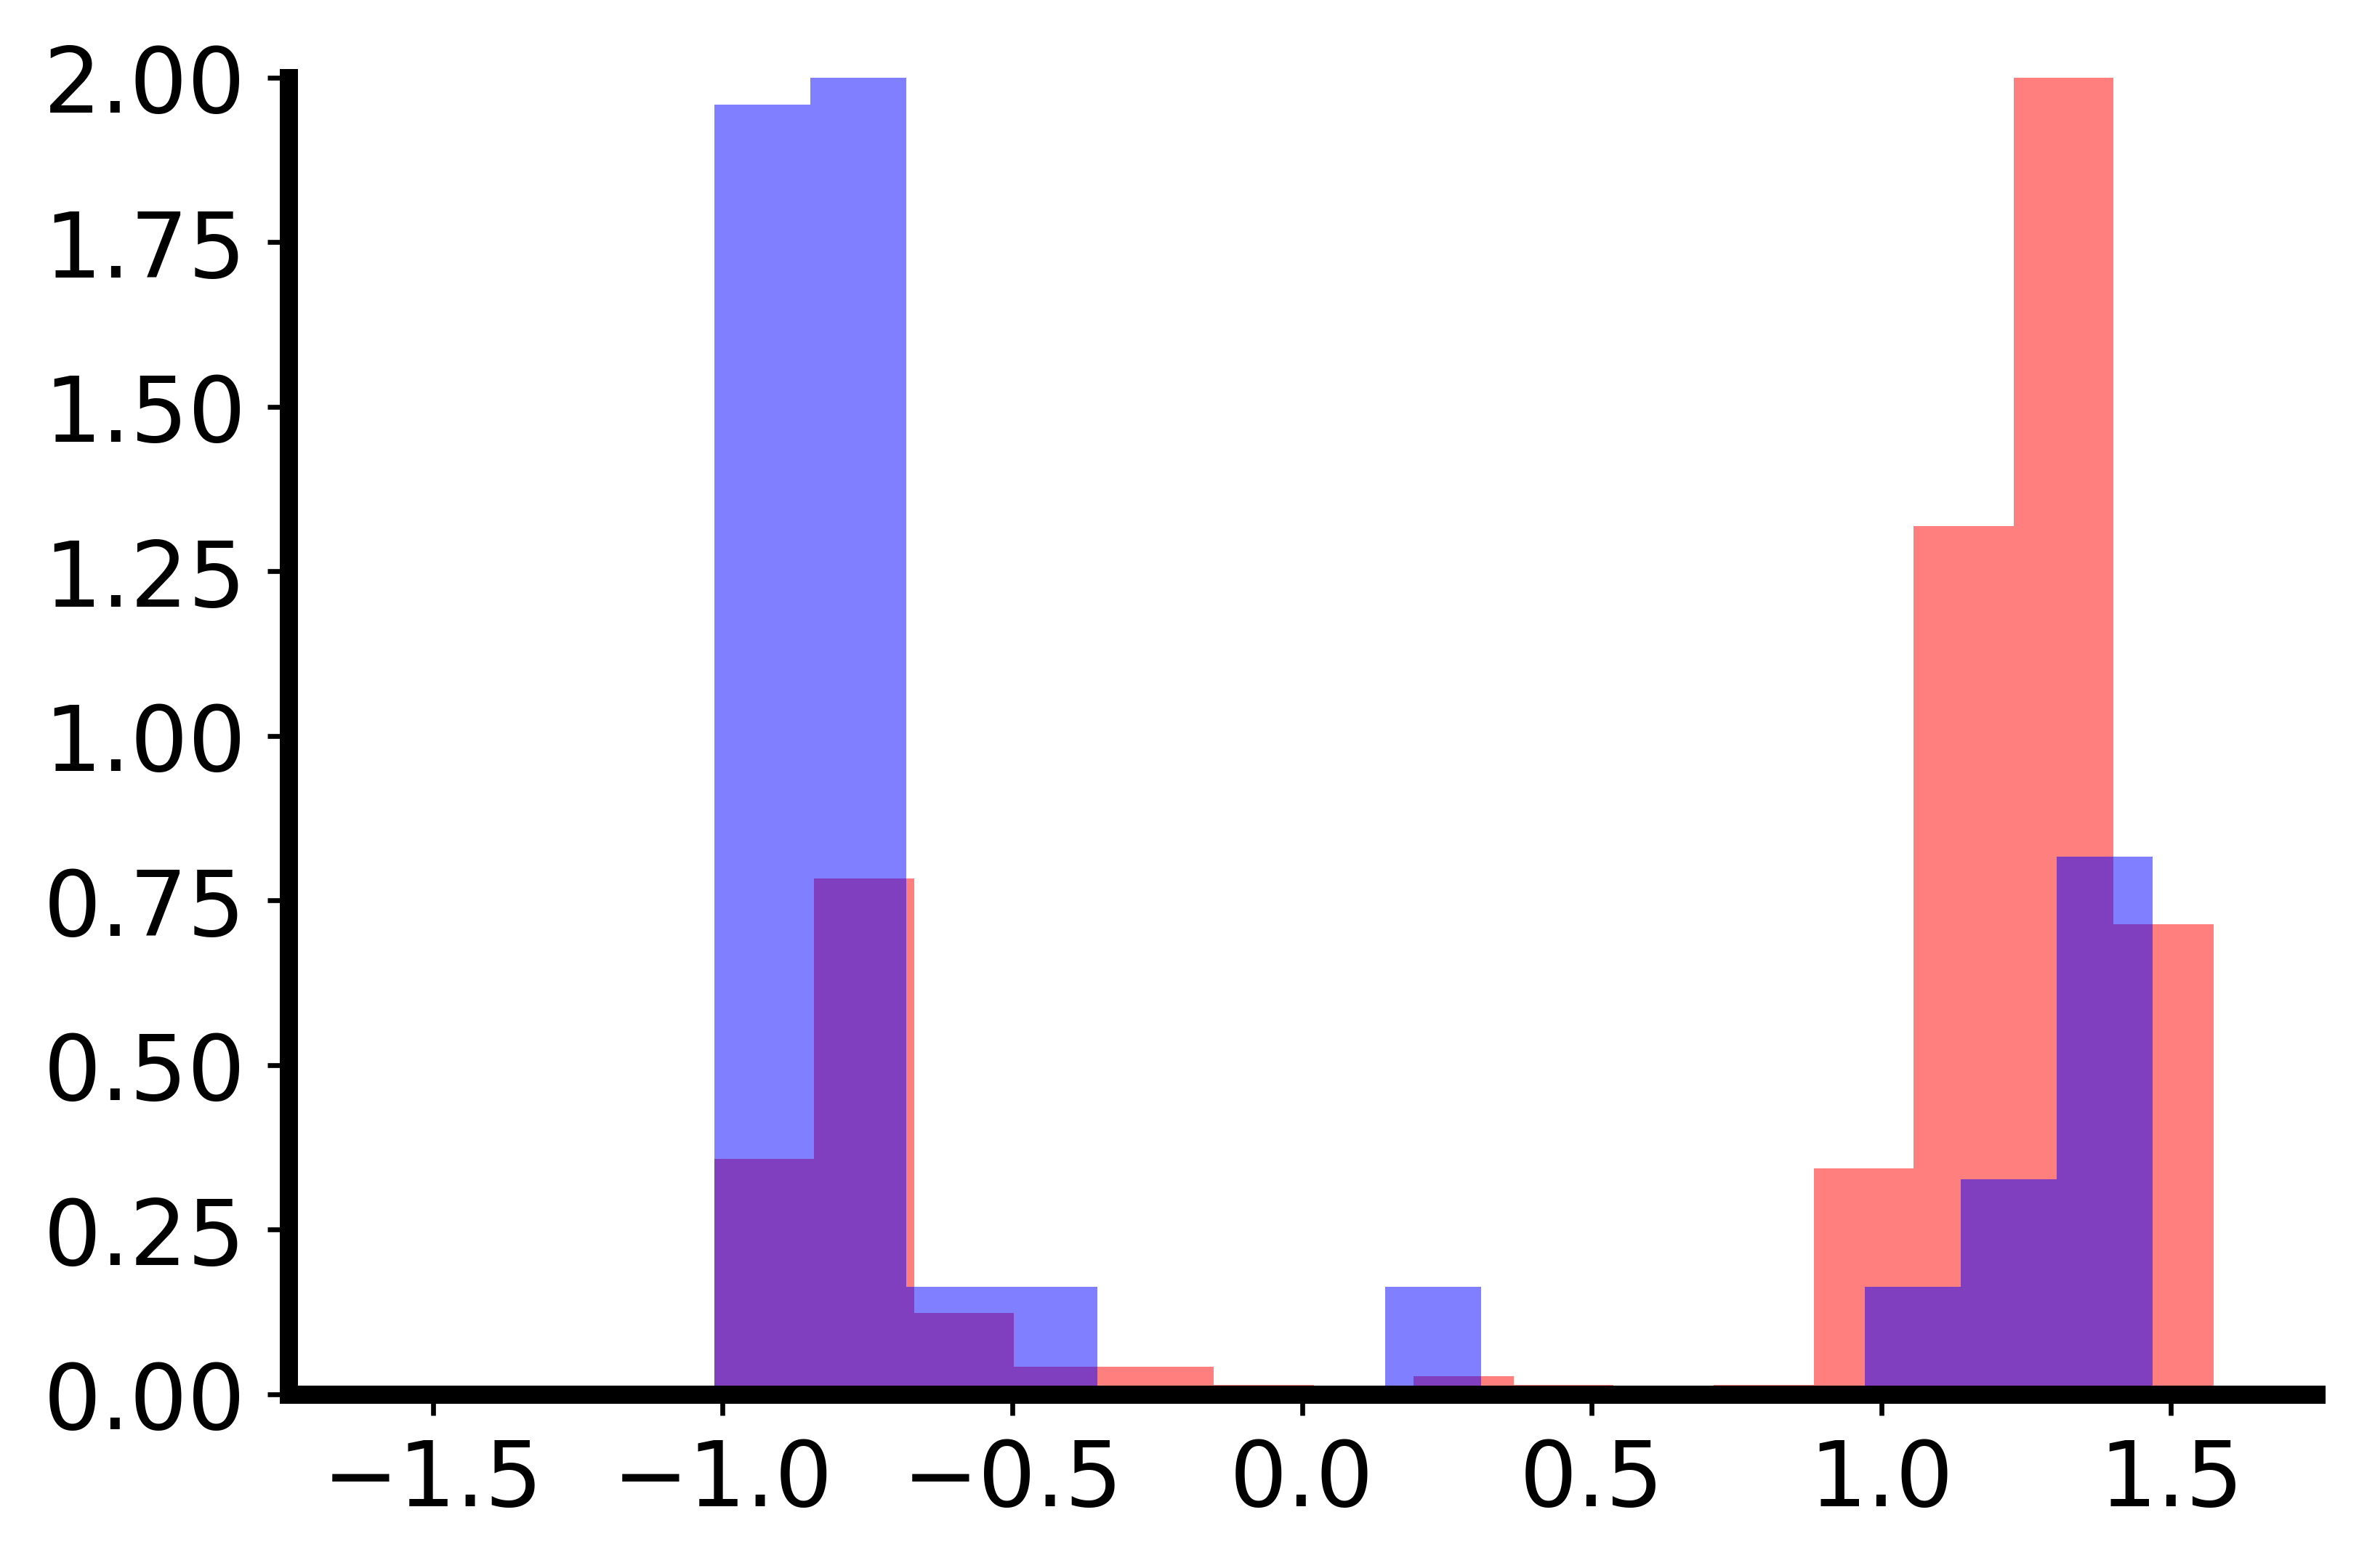

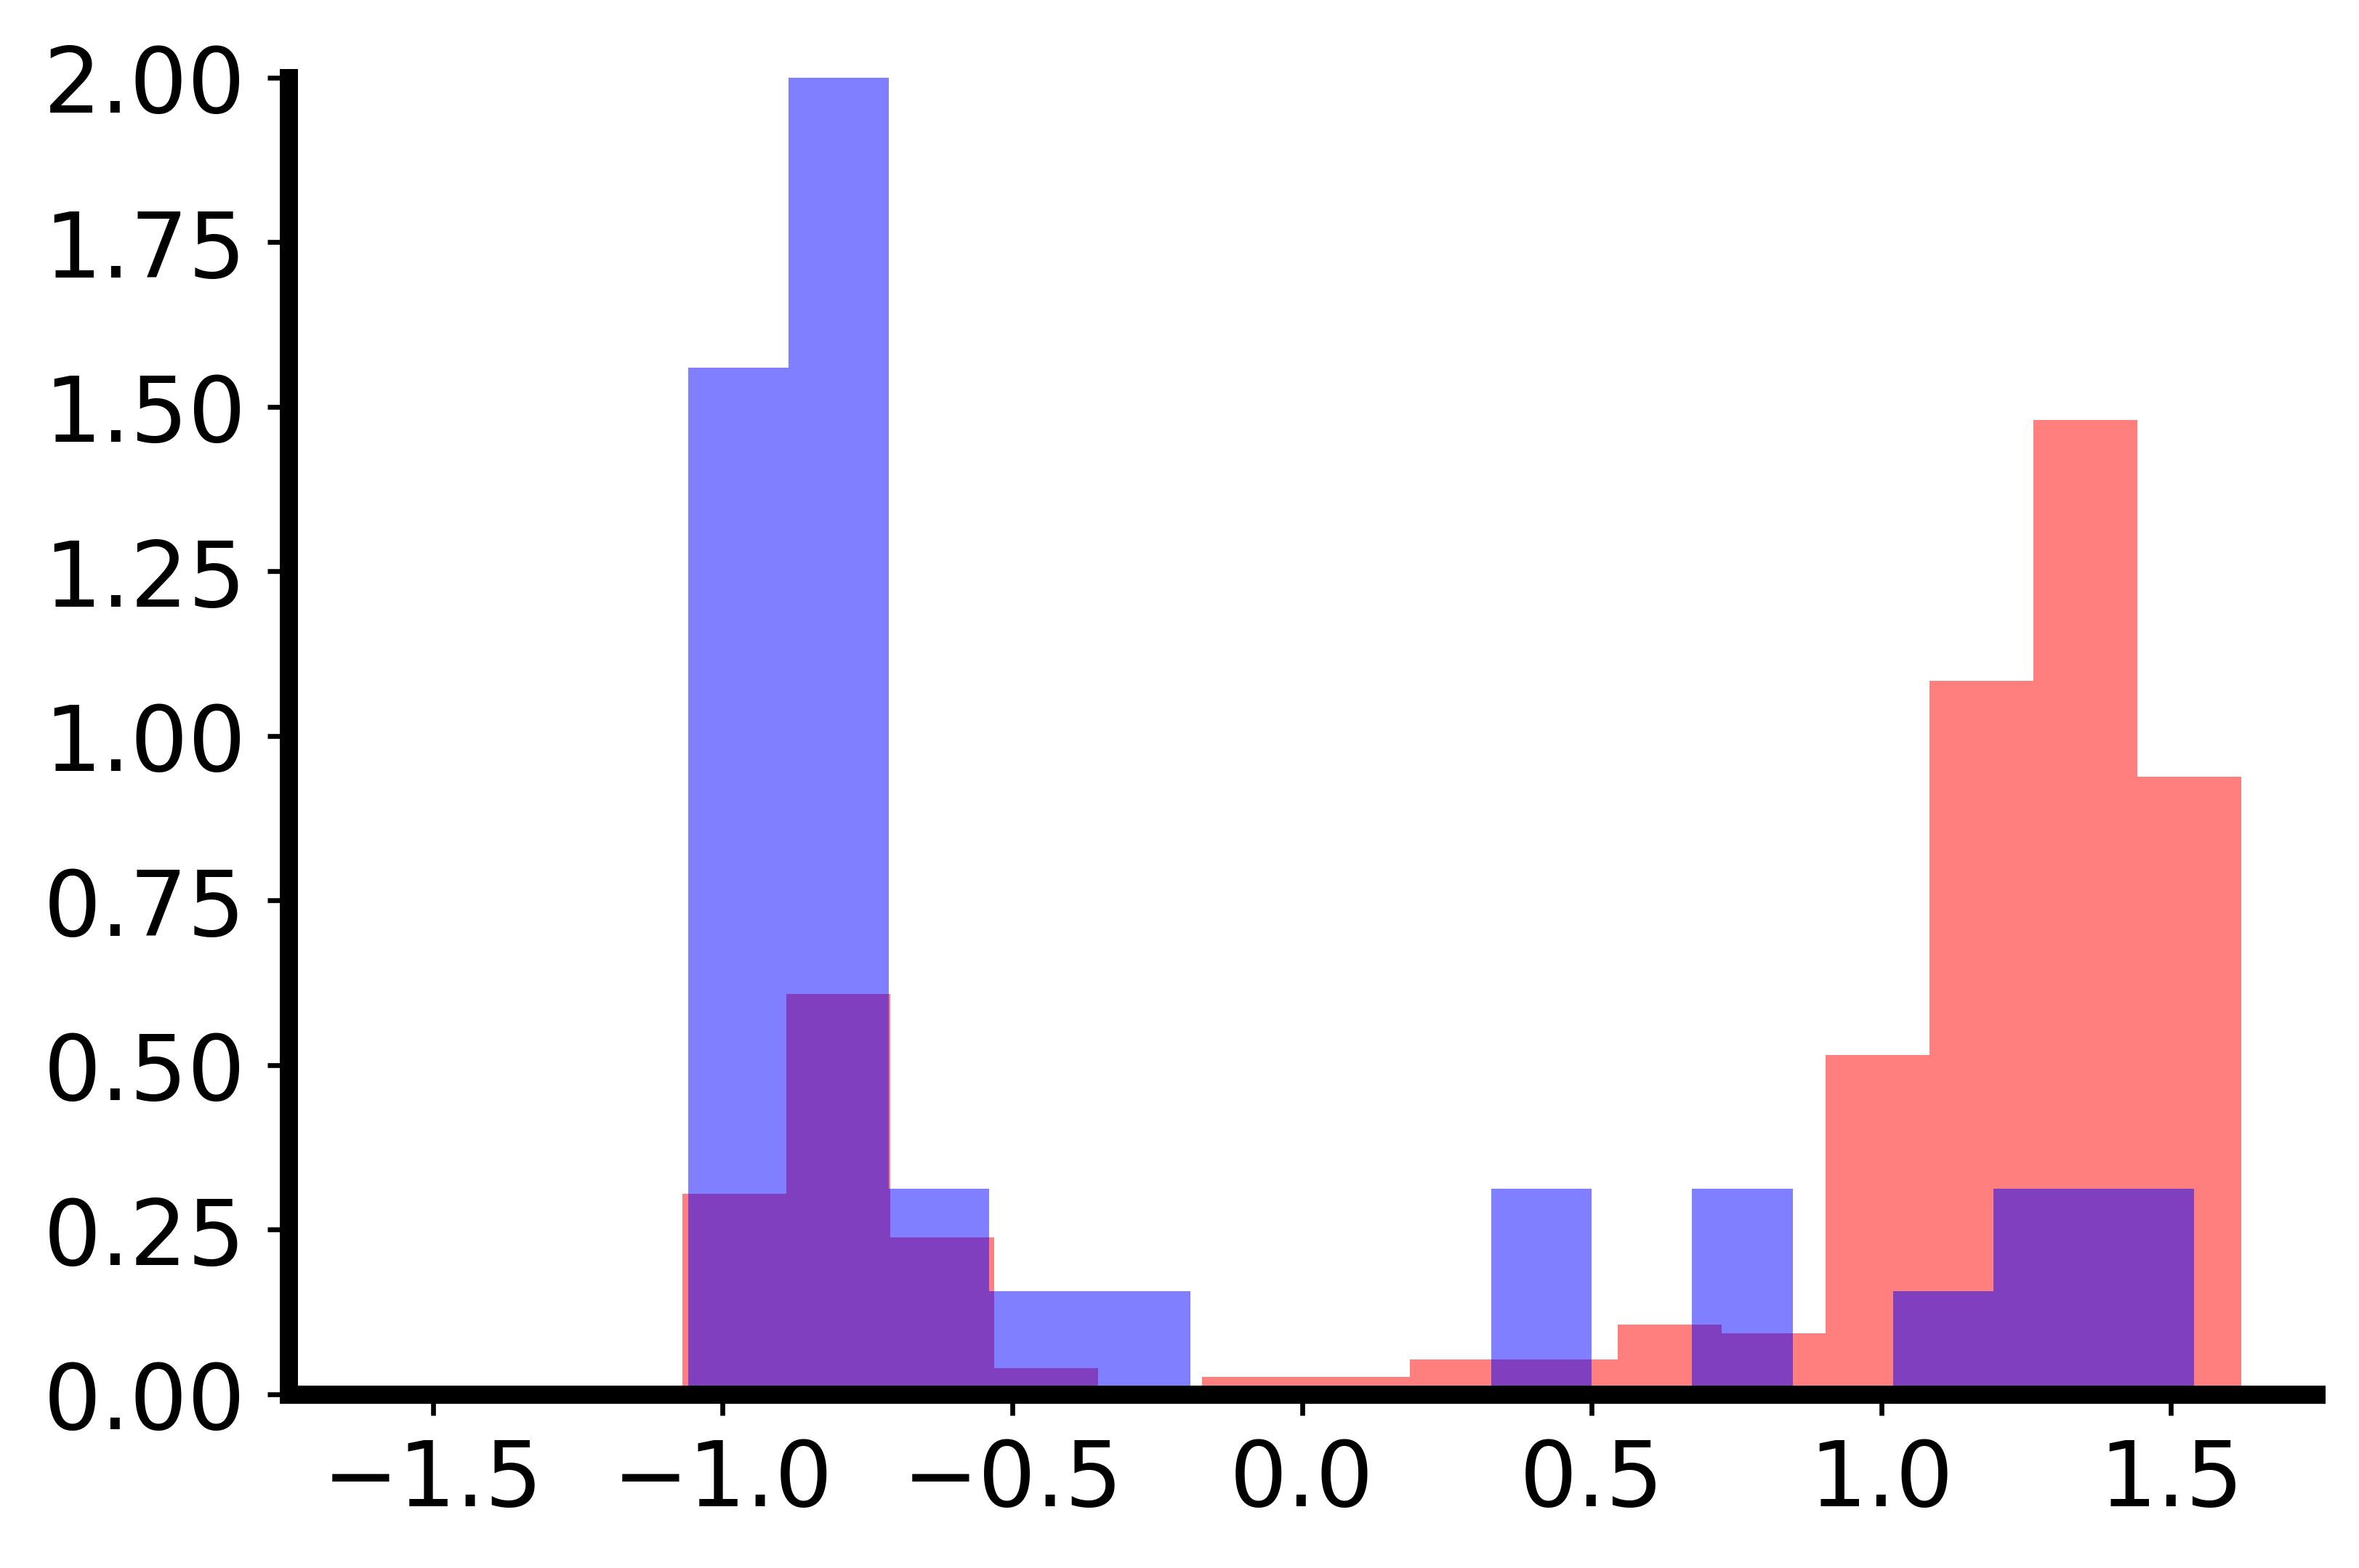

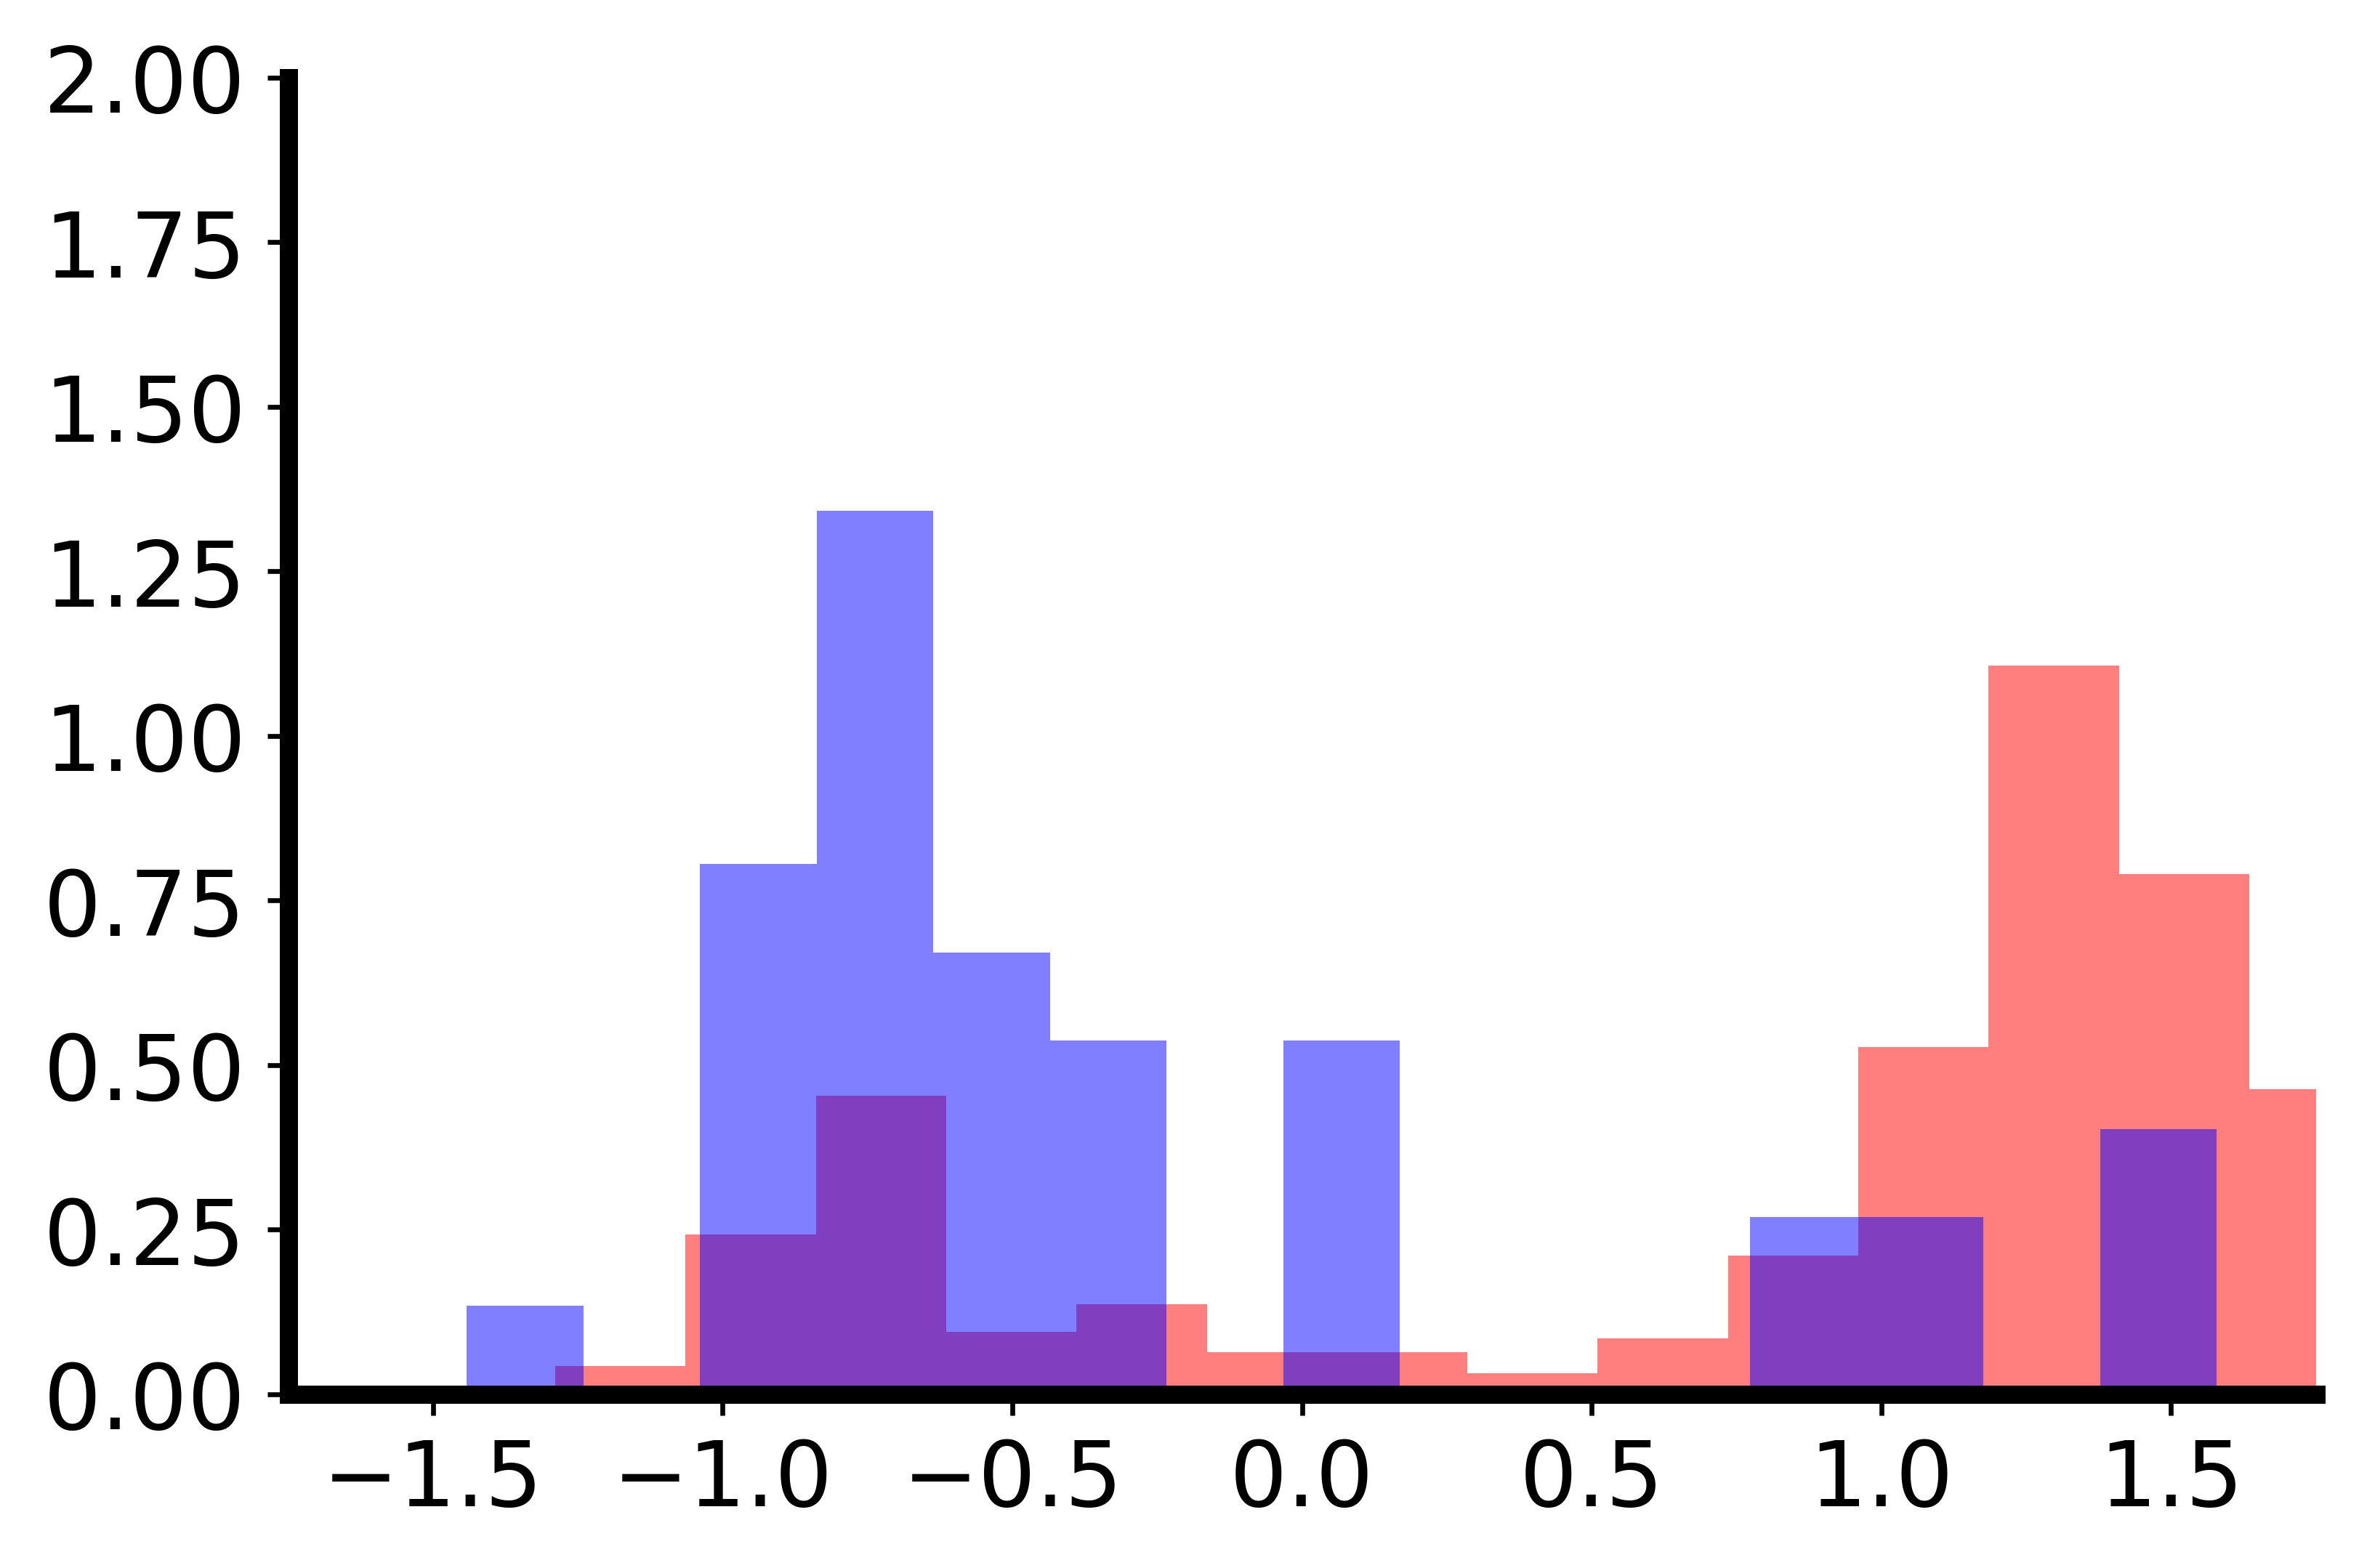

In [10]:
cluster_p = getHazardHistogramPlot_GBMLGG(model='path', c=[(-1.0, -0.5), (0, 0.75), (1, 1.5)])
cluster_g = getHazardHistogramPlot_GBMLGG(model='graph', c=[(-1.0, 0.0), (0.0, 1.0), (1, 1.5)])
cluster_o = getHazardHistogramPlot_GBMLGG(model='omic', c=[(-1.0, -0.5), (1, 1.25), (1.25, 1.5)])
cluster_pgo = getHazardHistogramPlot_GBMLGG(model='pathgraphomic_fusion', c=[(-1.0, -0.5), (1, 1.25), (1.25, 1.5)])
cluster_apgo = getHazardHistogramPlot_GBMLGG(model='agg_pathgraphomic_fusion', c=[(-1.0, -0.5), (1, 1.25), (1.25, 1.5)])
cluster_results = pd.concat([cluster_p, cluster_g, cluster_o, cluster_pgo, cluster_apgo])
cluster_results

In [11]:
for model in tqdm(['path', 'graph', 'omic', 'pathgraphomic_fusion']):
    makeHazardBoxPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/surv_15_rnaseq/', model=model)
    makeHazardSwarmPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/surv_15_rnaseq/', model=model)
    makeKaplanMeierPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/surv_15_rnaseq/', model=model)

100%|██████████| 4/4 [00:30<00:00,  7.69s/it]


In [12]:
makeHazardBoxPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/surv_15_rnaseq/', model='agg_pathgraphomic_fusion')
makeHazardSwarmPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/surv_15_rnaseq/', model='agg_pathgraphomic_fusion')
makeKaplanMeierPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/surv_15_rnaseq/', model='agg_pathgraphomic_fusion')

In [13]:
for model in tqdm(['path', 'pathgraphomic_fusion']):
    makeKaplanMeierPlot(ckpt_name='./checkpoints/TCGA_GBMLGG/surv_15_rnaseq/', model=model, plot_gt=False)

100%|██████████| 2/2 [00:02<00:00,  1.39s/it]


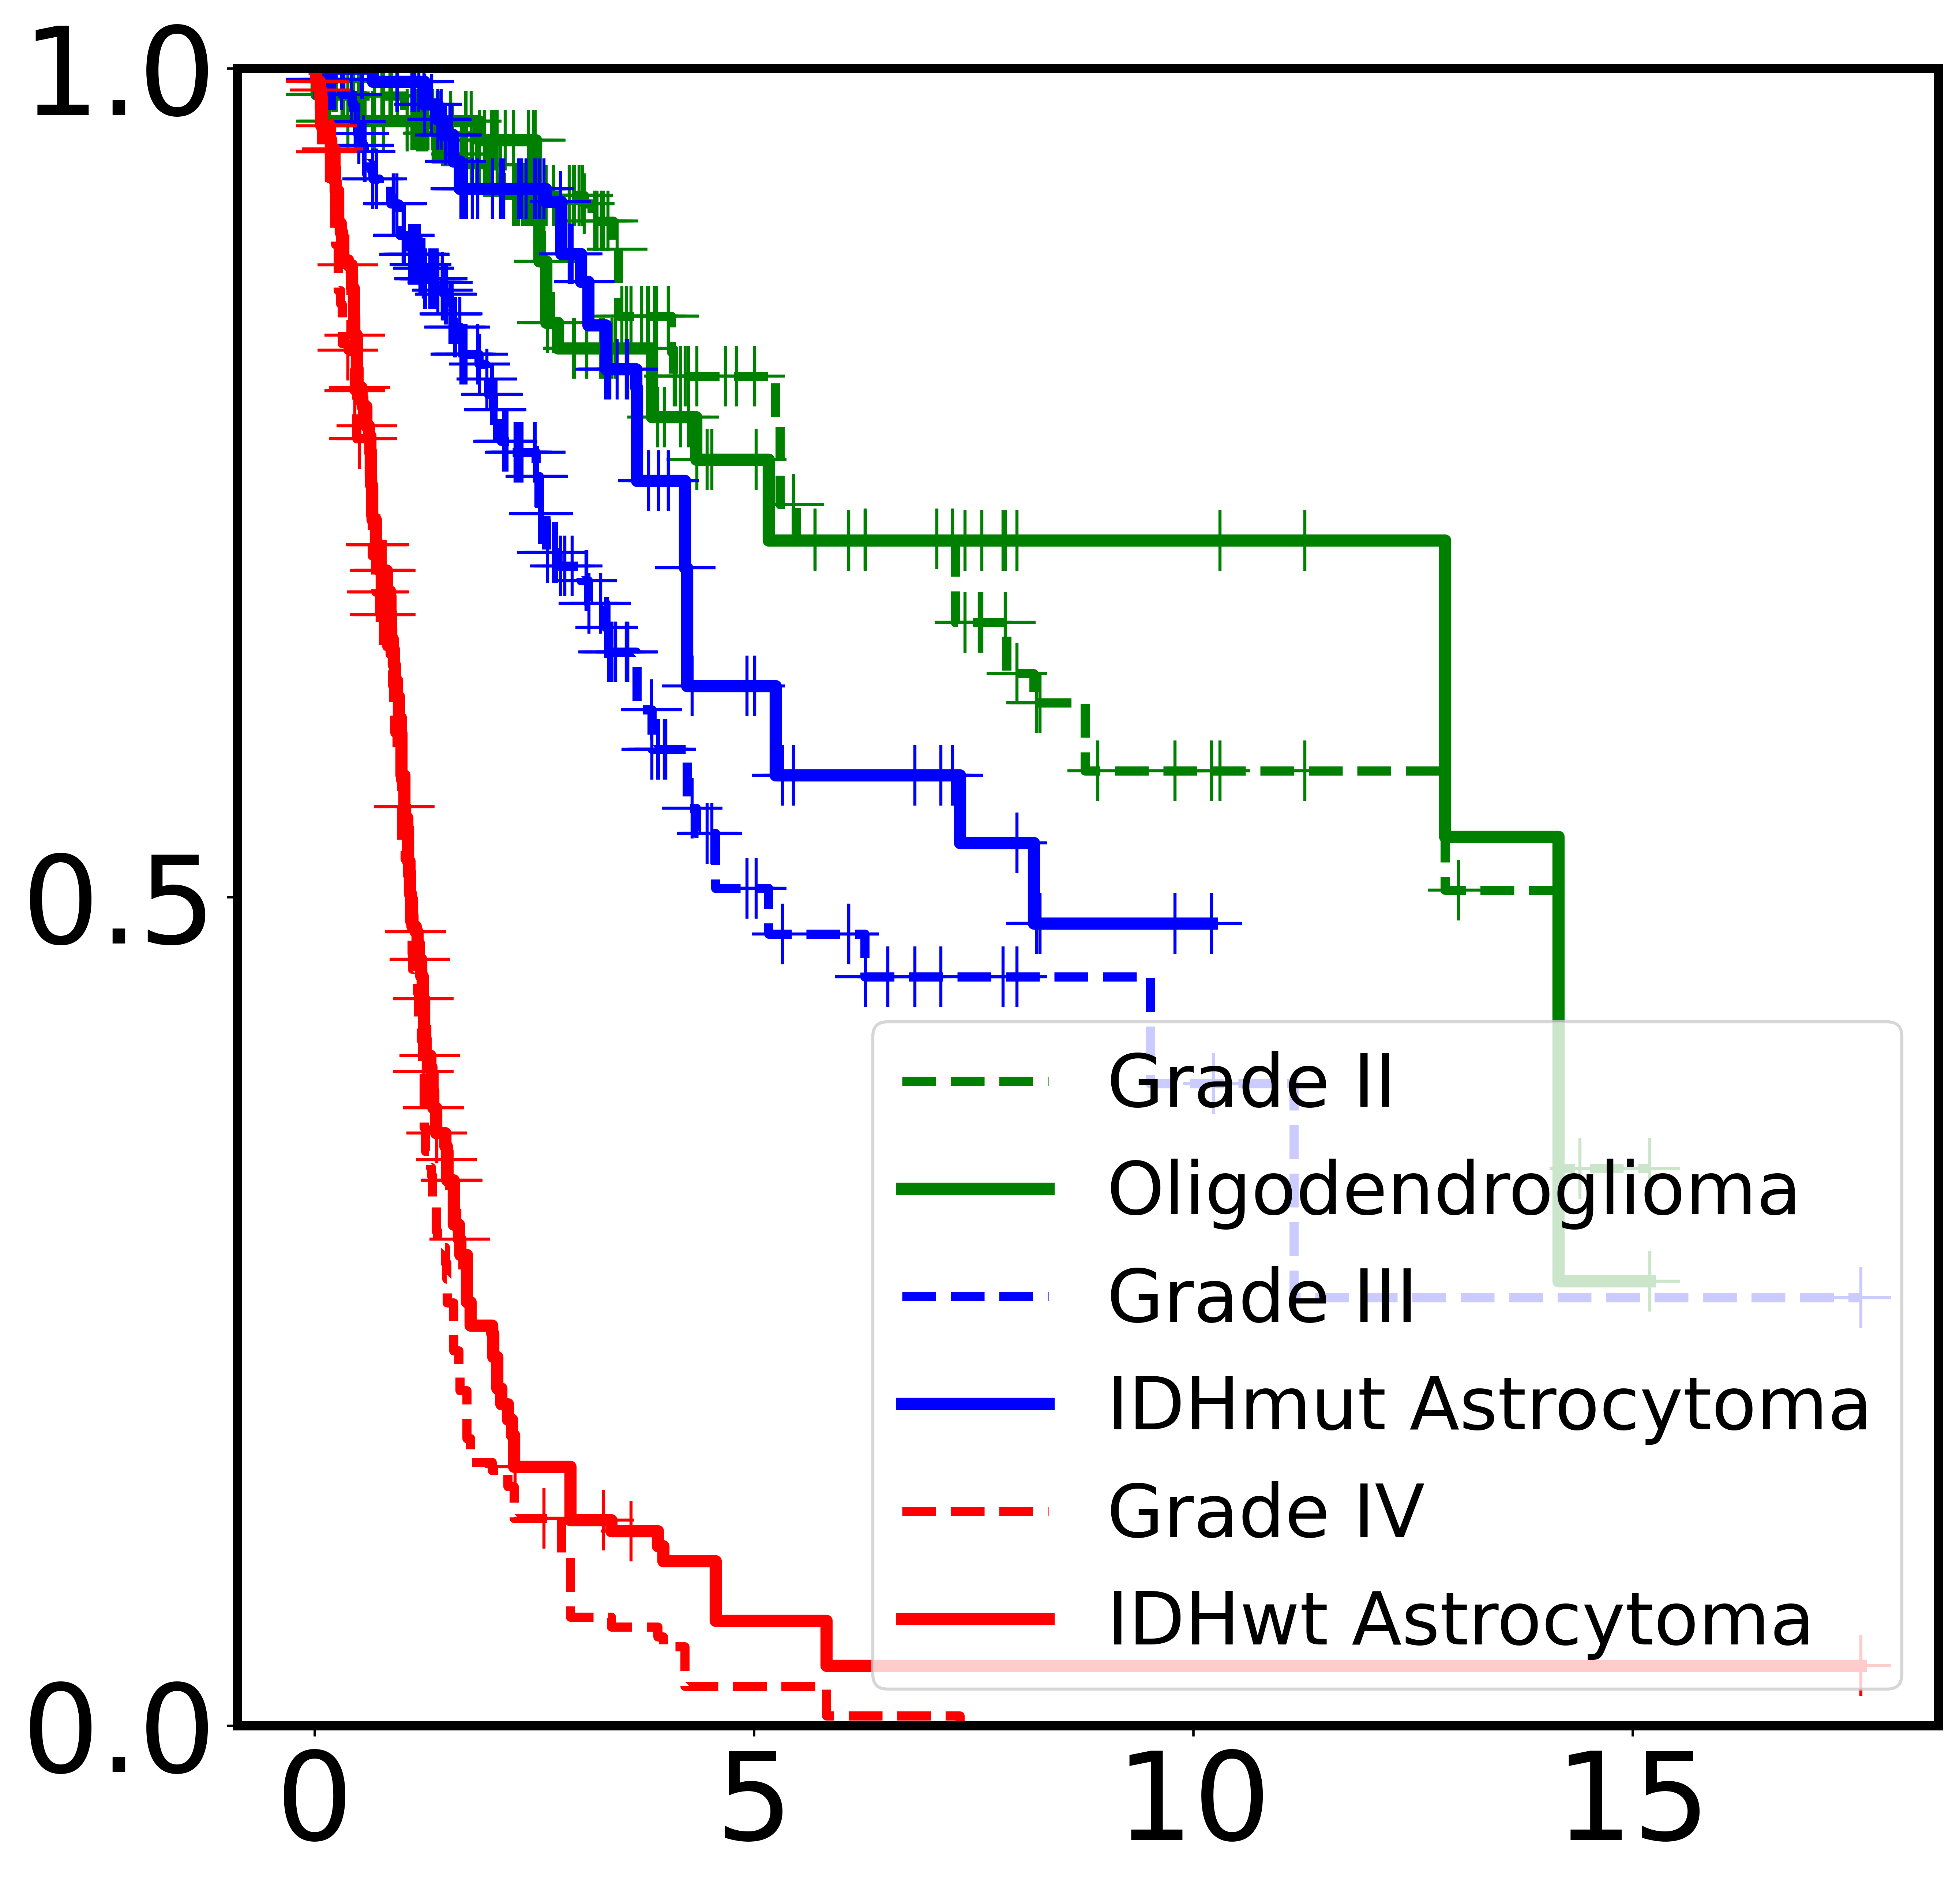

In [4]:
makeKaplanMeierPlot_Baseline(model='Histomolecular subtype')